<br></br>
# Data Mining and Decision Systems ACW
<br></br>
#### Student number: 201601628
<br>
<hr>

<a id="contents"></a>
<h1>Contents</h1>
<hr>
<div style="line-height: 2.5;">
<div><a href="#0"><h2 style="display: inline">.... 0. Notebook Initialisation</h2></a></div>
<div><a href="#01">........ <h3 style="display: inline">0.1. Package Imports</h3></a></div>
<div><a href="#02">........ <h3 style="display: inline">0.2. Data Loading</h3></a></div>
<div><a href="#03">........ <h3 style="display: inline">0.3. Misc</h3></a></div>
<p></p>
<div><a href="#1"><h2 style="display: inline">.... 1. CRISP DM</h2></a></div>
<div><a href="#11">........ <h3 style="display: inline">1.1. Business Understanding</h3></a></div>
<!--  -->
<div><a href="#12">........ <h3 style="display: inline">1.2. Data Understanding</h3></a></div>
<div><a href="#121">............ <h4 style="display: inline">1.2.1. Data Dictionary</h4></a></div>
<div><a href="#122">............ <h4 style="display: inline">1.2.2. Data Correctness</h4></a></div>
<div><a href="#1221">................ <h5 style="display: inline">1.2.2.1. Checking for Missing Data</h5></a></div>
<div><a href="#1222">................ <h5 style="display: inline">1.2.2.2. Checking for Duplicated Data</h5></a></div>
<div><a href="#1223">................ <h5 style="display: inline">1.2.2.3. Checking for Corrupt Data</h5></a></div>
<div><a href="#1224">................ <h5 style="display: inline">1.2.2.4. Evaluation of Concerns</h5></a></div>
<div><a href="#123">............ <h4 style="display: inline">1.2.3. Data Distribution</h4></a></div>
<div><a href="#124">............ <h4 style="display: inline">1.2.4. Feature Inspection</h4></a></div>
<div><a href="#125">............ <h4 style="display: inline">1.2.5. Evaluation of Understanding</h4></a></div>
<div><a href="#126">............ <h4 style="display: inline">1.2.6. Actions</h4></a></div>
<!--  -->
<div style="line-height:2.5;"><a href="#13">........ <h3 style="display: inline">1.3. Data Preparation</h3></a></div>
<div><a href="#131">............ <h4 style="display: inline">1.3.1. Cleaning</h4></a></div>
<div><a href="#132">............ <h4 style="display: inline">1.3.2. Transformation</h4></a></div>
<div><a href="#133">............ <h4 style="display: inline">1.3.3. Stratification (TTS)</h4></a></div>
<!--  -->
<div style="line-height:2.5;"><a href="#14">........ <h3 style="display: inline">1.4. Modeling</h3></a></div>
<div><a href="#141">............ <h4 style="display: inline">1.4.1. Baseline Models (all features)</h4></a></div>
<div><a href="#142">............ <h4 style="display: inline">1.4.2. Baseline Models (selected features)</h4></a></div>
<div><a href="#143">............ <h4 style="display: inline">1.4.3. Model Selection</h4></a></div>
<div><a href="#144">............ <h4 style="display: inline">1.4.4. Hyperparemeter Tuning</h4></a></div>
<!--  -->
<div style="line-height:2.5;"><a href="#15">........ <h3 style="display: inline">1.5. Evaluation</h3></a></div>
<!--  -->
<div style="line-height:2.5;"><a href="#16">........ <h3 style="display: inline">1.6. (Theoretical) Deployment</h3></a></div>
</div>

<!--  Data Understanding
Data dictionary
	Data assumptions
		Data conformity
			Cols exist
			Number of categories
			Category correctness
			Data types
		
		Missing data

		Duplicated data
			Duplicated records
			Duplicated attributes

		Data distribution/balance/outliers		

		Data correlations and feature inspection
			Univariate
			Covariate (with label)
			Multivariate (with label)
			Apriori

		Inspect and understand concerns

		Actions
		
Data prep
	Clean according to understanding
	Normalise and Encode
	TTS
		Compare with raw data


Modeling
	Baseline model all features & all models
		kfold
		multi-linear?
		dtree
		dnn	
	Baseline model selected features
		kfold
		dtree
		dnn
	Select best model
		tune hyperparams

Data prep2 
	impute missing data
	better or worse performance ? -->

<a id="0"></a>
<h2>0. Notebook Initialisation</h2>

<a id="01"></a>
<h3>0.1. Package Imports</h3>

In [1]:
## Import all libraries for use in notebook.
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import pandas as pd
import numpy as np

from sklearn import model_selection, linear_model, svm
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.feature_selection import SelectFromModel ## https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/
from sklearn.model_selection import StratifiedKFold ## https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

from pandas.api.types import is_string_dtype, is_numeric_dtype
from collections import defaultdict ## Used in automating and collating data discrepancies.

%matplotlib inline

<a href="#contents">[back to top]</a>

<a id="02"></a>
<h3>0.2. Data Loading</h3>

In [2]:
path = "data.csv" ## Relative path to train/test data.
rawData = pd.read_csv(path) ## Original data to make copies from and compare with.
rawData.head(3) ## Show dataframe.

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk


In [119]:
rawData.columns = [col.lower() for col in rawData.columns] ## Make headers lowercase to avoid some trivial errors.
rawData.head(3) ## Show dataframe.

,random,id,indication,diabetes,ihd,hypertension,arrhythmia,history,ipsi,contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk


In [140]:
# ids = sorted(rawData.id/10000)
# ids
# consecs = []

# j = 0
# for ID in ids:
#     j += 1
    
#     for i in range(5):
#         try:
#             if ID + i + 1 == ids[j + i]:
#                 consecs.append(ID)
#         except:
#             pass
# consecs

[7.8261,
 7.8264,
 7.8447,
 7.8484,
 7.866,
 7.8699,
 7.8745,
 7.8777,
 7.9264,
 7.9276,
 7.9338,
 7.9428,
 7.9594,
 7.9653,
 7.976,
 7.9854,
 7.996,
 8.0002,
 8.01,
 8.0124,
 8.0644,
 8.071,
 8.0754,
 8.0931,
 8.1288,
 8.1292,
 8.1313,
 8.1337,
 8.1475,
 8.15,
 8.1511,
 8.1598,
 8.1771,
 8.1914,
 8.1921,
 8.1946,
 8.2032,
 8.2064,
 8.2212,
 8.2389,
 8.2455,
 8.26,
 8.2627,
 8.2725,
 8.281,
 8.2822,
 8.2843,
 8.3319,
 8.3322,
 8.3328,
 8.3371,
 8.3445,
 8.3632,
 8.3808,
 8.3815,
 8.3931,
 8.395,
 8.4366,
 8.4421,
 8.452,
 8.4553,
 8.4632,
 8.4745,
 8.51,
 8.5129,
 8.5306,
 8.5322,
 8.5413,
 8.542,
 8.5736,
 8.575,
 8.5875,
 8.5917,
 8.604,
 8.6112,
 8.6467,
 8.6494,
 8.6547,
 8.6557,
 8.6596,
 8.66,
 8.6886,
 8.6931,
 8.7483,
 8.7562,
 8.7598,
 8.7621,
 8.7681,
 8.7715,
 8.7786,
 8.7823,
 8.7944,
 8.8076,
 8.8086,
 8.8262,
 8.8362,
 8.8399,
 8.8468,
 8.8683,
 8.8723,
 8.892,
 8.896,
 8.908,
 8.9536,
 8.9583,
 8.9691,
 8.9712,
 8.9796,
 8.985,
 8.9859,
 9.026,
 9.0582,
 9.0643,
 9.084,


In [130]:
# ids

[78261,
 78264,
 78447,
 78484,
 78660,
 78699,
 78745,
 78777,
 79264,
 79276,
 79338,
 79428,
 79594,
 79653,
 79760,
 79854,
 79960,
 80002,
 80100,
 80124,
 80644,
 80710,
 80754,
 80931,
 81288,
 81292,
 81313,
 81337,
 81475,
 81500,
 81511,
 81598,
 81771,
 81914,
 81921,
 81946,
 82032,
 82064,
 82212,
 82389,
 82455,
 82600,
 82627,
 82725,
 82810,
 82822,
 82843,
 83319,
 83322,
 83328,
 83371,
 83445,
 83632,
 83808,
 83815,
 83931,
 83950,
 84366,
 84421,
 84520,
 84553,
 84632,
 84745,
 85100,
 85129,
 85306,
 85322,
 85413,
 85420,
 85736,
 85750,
 85875,
 85917,
 86040,
 86112,
 86467,
 86494,
 86547,
 86557,
 86596,
 86600,
 86886,
 86931,
 87483,
 87562,
 87598,
 87621,
 87681,
 87715,
 87786,
 87823,
 87944,
 88076,
 88086,
 88262,
 88362,
 88399,
 88468,
 88683,
 88723,
 88920,
 88960,
 89080,
 89536,
 89583,
 89691,
 89712,
 89796,
 89850,
 89859,
 90260,
 90582,
 90643,
 90840,
 91034,
 91068,
 91108,
 91149,
 91198,
 91507,
 91618,
 91633,
 92110,
 92185,
 92236,


<a href="#contents">[back to top]</a>

<a id="03"></a>
<h3>0.3. Misc</h3>
Define some variables for easy access to properties of the raw data.

In [4]:
rawNRows = rawData.shape[0] ## Get number of rows in original dataframe.
rawNCols = rawData.shape[1] ## Get number of columns in original dataframe.
rawColNames = rawData.columns.values # Get column names which will often be used as an iterator.
concerns = defaultdict(list) ## Create a dict to store data discrepencies without littering notebook with outputs until required.

## For pretty printing.
## ''' n == number of indents '''
def Indent(n=1):
    indent = "    " * n
    return indent

<a href="#contents">[back to top]</a>

<a id="1"></a>
<h2>1. CRISP DM</h2>
<img src="crisp-dm.png" style="max-height:300px">
<a href="#contents">[back to top]</a>

<a id="11"></a>
<h3>1.1. Business Understanding</h3>

<div style="font-size: 14px">
<p>DOMAIN: Cardio-vascular medicine / healthcare</p>
<ul>
    <li>As a healthcare dataset it may be "natural", anonymised patient data, study data (e.g. clinical trial), or an aggregation of many different datasets.</li>
    <li>There is a chance there is "control" data (healthy cohorts) within the dataset or, similarly, focus groups that consist of unhealthy cohorts.</li>
    <li>Due to the largely subjective nature of clinical diagnosis (i.e. different doctors with varying levels of experience make the diagnoses), it's entirely possible that some data is mislabelled (has the wrong classification).</li>
    <li>It is also possible that some diagnoses or features are self certified or derived from incorrect patient assumptions (e.g. "Yes, I have a history of...").</li>
    </ul>
<p>PROBLEM TYPE: Classification</p>
<p>INPUTS: Tabulated patient data; 1520 records of 11 features</p>
<p>OUTPUTS:</p>
    <ul>
        <li>Risk</li>
        <li>No Risk</li>
    </ul>
</div>

In [118]:
arr = rawData.copy()
arr = arr[["arrhythmia", "indication", "label"]]
# arr["indication"] = arr["indication"].apply(lambda x: str(x).lower())
arr = arr[arr["indication"] == "A-F"]
# arr

# ## 375
# arr = arr[arr["arrhythmia"] == "no"]
# arr

# ## 85 AT RISK
# arr = arr[arr["arrhythmia"] == "no"]
# arr[arr["label"] == "Risk"]

# ## 290 AT NORISK
# arr = arr[arr["arrhythmia"] == "no"]
# arr[arr["label"] == "NoRisk"]

##-------------

# ## 118
# arr = arr[arr["arrhythmia"] == "yes"]
# arr

# ## 118 AT RISK
# arr = arr[arr["arrhythmia"] == "yes"]
# arr[arr["label"] == "Risk"]

# ## 0 AT NORISK
# arr = arr[arr["arrhythmia"] == "yes"]
# arr[arr["label"] == "NoRisk"]


,arrhythmia,indication,label
0,no,A-F,NoRisk
2,no,A-F,Risk
6,no,A-F,Risk
11,no,A-F,Risk
12,no,A-F,NoRisk
...,...,...,...
1486,no,A-F,NoRisk
1502,no,A-F,NoRisk
1505,no,A-F,NoRisk
1515,no,A-F,NoRisk


<a href="#contents">[back to top]</a>

<a id="12"></a>
<h3>1.2. Data Understanding</h3>

<a id="121"></a>
<h4>1.2.1. Data Dictionary</h4>

<table>
    <tbody>
        <tr>
            <td>
                <p><strong>Attribute</strong></p>
            </td>
            <td>
                <p><strong>Value Type</strong></p>
            </td>
            <td>
                <p><strong>NumberOfValues</strong></p>
            </td>
            <td>
                <p><strong>Values</strong></p>
            </td>
            <td>
                <p><strong>Comment</strong></p>
            </td>
            <td>
                <p><strong>Non-clinical Description</strong></p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Random</p>
            </td>
            <td>
                <p>Real</p>
            </td>
            <td>
                <p>Number of Records</p>
            </td>
            <td>
                <p>Unique</p>
            </td>
            <td>
                <p>Real number of help in randomly sorting the data records</p>
            </td>
            <td>
                <p>Real number of&nbsp;help&nbsp;in randomly sorting the data records: Should be unique values.</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Id</p>
            </td>
            <td>
                <p>Integer</p>
            </td>
            <td>
                <p>Max of Number of Records</p>
            </td>
            <td>
                <p>Unique to patient</p>
            </td>
            <td>
                <p>Anonymous patient record identifier: Should be unique values unless patient has multiple sessions</p>
            </td>
            <td>
                <p>Anonymous patient record identifier: Should be unique value per patient. Patient can have multiple sessions</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Indication</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Four</p>
            </td>
            <td>
                <p>{a-f, asx, cva, tia}</p>
            </td>
            <td>
                <p>What type of Cardiovascular event triggered the hospitalisation?</p>
            </td>
            <td>
                <p>What type of Cardiovascular event triggered the hospitalisation?</p><p> a-f :&nbsp;Atrial-Fibrillation</p>
                <p>asx&nbsp;:&nbsp;Asymptomatic Stenosis&nbsp;</p><p>cva&nbsp;: Cardiovascular Arrest</p>
                <p>tia&nbsp;:&nbsp;Transient Ischemic Attack ("mini-heart attack")</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Diabetes</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from Diabetes?</p>
            </td>
            <td>
                <p>Does the patient suffer from Diabetes?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>IHD</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from Coronary artery disease (CAD), also known as ischemic heart disease (IHD)?</p>
            </td>
            <td>
                <p>Does the patient suffer from Coronary artery disease (CAD), also known as ischemic heart disease (IHD)?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Hypertension</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from Hypertension?</p>
            </td>
            <td>
                <p>Does the patient suffer from Hypertension?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Arrhythmia</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Does the patient suffer from</p>
                <p>Arrhythmia (i.e. erratic heart beat)?</p>
            </td>
            <td>
                <p>Does the patient suffer from Arrhythmia (i.e. erratic&nbsp;heart beat)?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>History</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{no, yes}</p>
            </td>
            <td>
                <p>Has the patient a history of</p>
                <p>Cardiovascular interventions?</p>
            </td>
            <td>
                <p>Has the patient a history of Cardiovascular interventions?</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>IPSI</p>
            </td>
            <td>
                <p>Integer</p>
            </td>
            <td>
                <p>Potentially 101</p>
            </td>
            <td>
                <p>[0, 100]</p>
            </td>
            <td>
                <p>Percentage figure for cerebral ischemic lesions defined as ipsilateral</p>
            </td>
            <td>
                <p>Percentage figure for cerebral ischemic lesions defined as ipsilateral</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Contra</p>
            </td>
            <td>
                <p>Integer</p>
            </td>
            <td>
                <p>Potentially 101</p>
            </td>
            <td>
                <p>[0, 100]</p>
            </td>
            <td>
                <p>Percentage figure for contralateral cerebral ischemic lesions</p>
            </td>
            <td>
                <p>Percentage figure for contralateral cerebral ischemic lesions</p>
            </td>
        </tr>
        <tr>
            <td>
                <p>Label</p>
            </td>
            <td>
                <p>Nominal</p>
            </td>
            <td>
                <p>Two</p>
            </td>
            <td>
                <p>{risk, norisk}</p>
            </td>
            <td>
                <p>Is the patient at risk (Mortality)?</p>
            </td>
            <td>
                <p>Is the patient at risk (Mortality)?</p>
            </td>
        </tr>
    </tbody>

<br>
<b style="color: red;">NOTE:</b> "Session" is also included in the non-clinical description, but not included in the data dictionary.
<br>
<table>
    <tr>
        <td>
            <p><strong>Attribute</strong></p>
        </td>
        <td>
            <p><strong>Value Type</strong></p>
        </td>
        <td>
            <p><strong>NumberOfValues</strong></p>
        </td>
        <td>
            <p><strong>Values</strong></p>
        </td>
        <td>
            <p><strong>Comment</strong></p>
        </td>
        <td>
            <p><strong>Non-clinical Description</strong></p>
        </td>
    </tr>
    <tr>
        <td>
            <p>Session</p>
        </td>
        <td>
            <p>Unknown</p>
        </td>
        <td>
            <p>Max Number of Records (assumed)</p>
        </td>
        <td>
            <p>Unique to patient</p>
        </td>
        <td>
            <p>Unknown</p>
        </td>
        <td>
            <p>Anonymous patient session identifier.</p>
        </td>
    </tr>
</table>
<br>

<a href="#contents">[back to top]</a>

<a id="122"></a>
<h4>1.2.2. Data Correctness</h4>
Check for data conformity to data dictionary and explore common pitfalls (e.g. missing or duplicate data). All checks are collated in a dictionary ("concerns") by  type of check (e.g. "MISSING DATA") to help notebook readability.

<a id="1221"></a>
<h5>1.2.2.1 Checking for Missing Data</h5>
Look for records containing nan or missing values:

In [5]:
df = rawData.copy() ## Manipulate a COPY of the original data as to not affect it.

concerns["MISSING DATA"] = [Indent() + "The following columns have missing data:"] ## Init list for missing data concerns.
records = []

for col in rawColNames:
    nans = df[col][df[col].isna() == True] ## Get all nan values in the series (df[col]).
    indexes = nans.index.values ## Get the indexes of those nans.
    nNans = len(nans) ## Count how many there are.
    
    ## If there are nans, list them in the dictionary, under the MISSING DATA key.
    if (nNans > 0):
        concernStr = (Indent(2) + col + " has " + str(nNans) + " nan values at indexes:" + str(indexes))
        concerns["MISSING DATA"].append(concernStr)
        records += list(indexes)

## Record the % of missing data if any is missing.
if (len(records) > 0):
    nRecords = len(set(records))
    percent = (100/rawNRows) * nRecords
    concerns["MISSING DATA"][0] = (Indent() + "The following columns have missing data which affects " + str(nRecords) + " records (" + str(round(percent, 2)) + "% of all records).")

<a href="#contents">[back to top]</a>

<a id="1222"></a>
<h5>1.2.2.2 Checking for Duplicated Data</h5>
Look for records that are entirely the same or very similiar (e.g. allow different values for random or id).

In [6]:
## Helper function for checking for duplicates when any number of columns are dropped.
## ''' ignore == list of columns to drop '''
## ''' df == dataframe to check for duplicates '''
def CheckForDuplicates(ignore=[], df=rawData.copy()):
    dupes = df.drop(columns=ignore)[df.drop(columns=ignore).duplicated() == True]
    if dupes.shape[0] > 0:
        return dupes
    else:
        return 0 # "No duplicates."
    
## Helper function for appending duplicates to concerns.
## ''' dupes == df => result from CheckForDuplicates() '''
## ''' out == bool => print output or not '''
def AppendDuplicateConcerns(dupes, ignore="NO", out=False):
    if (type(returnVal) != int):
        ## When ignoring # columns, there are n duplicated records at indexes [].
        nDupes = str(len(dupes))
        indexes = dupes.index.values
        concerns["DUPLICATED DATA"].append(Indent(2) + str(nDupes) + " duplicates were found when ignoring columns " + str(ignore) + " at indexes " + str(indexes))
        if (out):
            print(dupes)

Check for records that are complete duplicates (all features are the same):

In [7]:
concerns["DUPLICATED DATA"] = [Indent() + "The following potential duplicates were found:"] ## Init list.
returnVal = CheckForDuplicates()
AppendDuplicateConcerns(returnVal)

Check for records that are duplicates when any single column is removed:

In [8]:
for col in rawColNames:
    returnVal = CheckForDuplicates(ignore=[col])
    AppendDuplicateConcerns(returnVal, [col])

Check for records that are duplicates when any pair of features are ignored:

In [9]:
## Nested for loop to check ALL combinatory pairs.
i = 0
for colO in rawColNames: ## Outer column; i.e. column[n].
    i+=1
    for colI in rawColNames[i:]: ## Inner column; i.e. column[n+1].
        ignoring = [colO, colI]
        returnVal = CheckForDuplicates(ignore=ignoring)
        AppendDuplicateConcerns(returnVal, ignore=ignoring)

Check for records that are duplicates when any trio of features are ignored:

<div style="font-size: 1rem;"><b style="color: red;">NOTE:</b> this code has been commented out for readability. The omission of random and id results and any other feature results 90%+ "duplicates", which is discussed in the Evaluation of Concerns section.</div>

In [10]:
# i = 0
# j = 1
# for colO in rawColNames: ## Outer column; i.e. column[n].
#     i += 1
#     for colI in rawColNames[i:]: ## Inner column; i.e. column[n+1].
#         j += 1
#         for colIM in rawColNames[j:]: ## Innermost column; i.e. column[n+1+1].
#             ignoring = [colO, colI, colIM]
#             returnVal = CheckForDuplicates(ignore=ignoring)
#             AppendDuplicateConcerns(returnVal, ignore=ignoring)

<a href="#contents">[back to top]</a>

<a id="1223"></a>
<h5>1.2.2.3 Checking for Corrupted Data</h5>
Create an object that defines a set of assumptions as described in the data dictionary and flag any concerns.

In [11]:
# Dict derived from data dictionary for automated checking.
## key == column name.
## - valType == python data type.
## - nVals == range of accepted values for continuous column.
## - vals == possible values for any categoric or discrete column.

dataAssumptions = {
    "random":{ ## Col name.
        "valType": float, ## Real.
        "nVals": (rawNRows, rawNRows), # Unique per record.
    },  
    "id":{
        "valType": int,## Integer.
        "nVals": (1, rawNRows), ## Unique per patient.
    },
    "indication":{
        "valType": str, ## Nominal.
        "vals": ["a-f","asx","cva","tia"] ## Possible values (except nan).
    },
    "diabetes":{
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "ihd":{
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "hypertension":{
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "arrhythmia":{
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "history": {
        "valType": str, ## Nominal.
        "vals": ["yes", "no"]
    },
    "ipsi": {
        "valType": int, ## Integer.
        "vals": np.arange(0,101) # Percentage.
    },
    "contra": {
        "valType": int, ## Integer.
        "vals": np.arange(0,101), # Percentage.
    },
    "label": {
        "valType": str, ## Nominal.
        "vals": ["risk", "norisk"]
    },
    "session":{ ## This feature was given separate to the dictionary.
        "valType": object, # Unknown.
        "nVals": (1, rawNRows), ## Unique per patient (assumed).
    },
}

Check that all expected columns exist in the data:

In [12]:
df = rawData.copy()#.dropna()
concerns["MISSING COLUMNS"] = [Indent() + "The following expected columns are missing from the data:"] ## Init list.

for key in dataAssumptions:
    if (key not in rawColNames):
        concerns["MISSING COLUMNS"].append(Indent(2) + key)
# print(concerns["MISSING COLUMNS"])

Check that the number of unique values or categories (excluding nan) in each column is as expected.

In [13]:
df = rawData.copy().dropna()
concerns["NUMBER OF UNIQUE VALUES"] = [Indent() + "The following columns have an unexpected number of unique values or categories:"] ## Init list.

for k, v in dataAssumptions.items(): ## k = key, v == value.
    if (k in rawColNames): ## If it is a column we are aware of...
        actualNValues = len(df[k].unique()) ## Get unique values.
        try:
            expectedNValues = (1, len(v["vals"])) ## Assume is a discrete or categoric column.
        except:
            expectedNValues = v["nVals"] ## Actually, column is continuous.

        if (not(actualNValues >= expectedNValues[0]) or not(actualNValues <= expectedNValues[1])): ## Check actual number of values is within the expected range.           
            concerns["NUMBER OF UNIQUE VALUES"].append(Indent(2) + k + "\n" + Indent(3) + "Expected: " + str(expectedNValues) + "\n" + Indent(3)+ "Actual: " + str(actualNValues))

Check that the unique values or categories in each column are as expected.

In [14]:
df = rawData.copy()#.dropna()
concerns["EXPECTED VALUES"] = [Indent() + "The following columns have unexpected values or categories:"] ## Init list.

for k, v in dataAssumptions.items(): ## k = key, v == value.
    if (k in rawColNames):
        actualValues = df[k].dropna().unique() ## Ignore nan values for this check.
        try: ## Assume column is categorical/discrete.
            expectedValues = v["vals"]
            if (not(set(actualValues) & set(expectedValues))):
                concerns["EXPECTED VALUES"].append(Indent(2) + k+ "\n" + Indent(3)+ "Expected: " + str(set(expectedValues)) + "\n" + Indent(3)+ "Actual: " + str(set(actualValues)) + "\n")
        except: ## Is not categorical column.
            continue 

Check that the data type of each column is as expected:

In [15]:
df = rawData.copy()#.dropna()
concerns["EXPECTED TYPES"] = [Indent() + "The following columns have entries of the wrong data type:"] ## Init list.

for k, v in dataAssumptions.items(): ## k = key, v == value.
    if (k in rawColNames):
        actualT = df[k].dropna().describe().dtypes ## Ignore nan values for this check.
        expectedT = v["valType"] 

        if (expectedT == int or expectedT == float):
            correctT = is_numeric_dtype(actualT) ## Check is numeric.
        else:
            correctT = is_string_dtype(actualT) ## Check is obj/str.
        
        if (not correctT):
            concerns["EXPECTED TYPES"].append(Indent(2) + k + "\n" + Indent(3) + "Expected: " + str(expectedT) + "\n" + Indent(3) +"Actual: " + str(actualT))

<a id="1224"></a>
<h5>1.2.2.4. Evaluation of Concerns</h5>
Look at collated concerns before further analysis.

In [16]:
actions = [] ## Create list to store actions to be carried out in the cleaning phase.

for key in concerns:
    print ("\n" + str(key) + "\n")
    for val in concerns[key]:
        print(val)
    print("\n________________________________________________________________\n")


MISSING DATA

    The following columns have missing data which affects 17 records (1.12% of all records).
        indication has 3 nan values at indexes:[ 442  822 1007]
        diabetes has 2 nan values at indexes:[447 514]
        hypertension has 3 nan values at indexes:[201 590 983]
        history has 2 nan values at indexes:[337 784]
        ipsi has 4 nan values at indexes:[620 752 845 916]
        label has 3 nan values at indexes:[ 812  974 1418]

________________________________________________________________


DUPLICATED DATA

    The following potential duplicates were found:
        1094 duplicates were found when ignoring columns ['random', 'id'] at indexes [  13   62   65 ... 1517 1518 1519]
        1 duplicates were found when ignoring columns ['id', 'contra'] at indexes [1134]

________________________________________________________________


MISSING COLUMNS

    The following expected columns are missing from the data:
        session

____________________________

<b>Missing Data</b>

Thankfully, there is a **very small amount of data missing (1.12%)**. Therefore effect of imputing values would probably be slight, or even cause more harm than good.

- <p style="color: red">Initially, the 17 records will be removed.<p>

- <p style="color: red">For continued analysis (i.e. plotting distributions etc.) these records will be ignored for the time being.</p>

In [17]:
actions.append("cleanData = cleanData.dropna() ## Drop nan values.")

<b>Duplicated Data</b>

1. This check finds that **no records are duplicated in their entirety**, or when a single column is ignored.


2. When pairs of columns are ignored, some duplicates appear.
    - 1094 duplicates were found when ignoring columns ['random', 'id'].
    
        **This suggests quite a homogenous data set** regardless of duplicates, since these features are the only ones supposed to be unique. This suggestion is supported by the quantity of 'duplicates', the fact that no duplicates were reported when 'random' alone was removed, and the fact that id is unique as expected (see below).
    
    -
        
    - 1 duplicates were found when ignoring columns ['id', 'contra'].
    
        Assuming that this dataset was manually created in a tool like Excel, a telltale sign would be **locality** (if the duplicate records are next to each other).


3. Checking for duplicates with combinations of 3 features removed proved redundant based on the effect of removing 'id' and 'random'; removing another column means almost all of the data (90%+) is duplicated, which is assumed to be highly unlikely.

-

To be thorough, **a check can be made for the locality of supposed duplicates**. A depth of 3 has been selected arbitrarily (i.e. check if a given record is the same as any of the next 3 records): 

In [18]:
df = rawData.copy()#.dropna()
df = df.drop(columns=["id","random"])
df = df[df.duplicated(keep=False) == True]
depth = 3 ## Look for duplicates that are up-to n.. records apart.

# Init lists in dictionary.
dupes = {}
for i in range(1, depth + 1):
    dupes[str(i) + " records away"] = []

i = 0
for index, row in df.iterrows():
    i += 1
    for nextIndex, nextRow in df[i:i+1].iterrows(): ## Grab next record.
        for j in range(1, depth + 1):
            if ((nextIndex == index + j) and set(row) == set(nextRow)): ## Check if index is local and values are same.
                dupes[str(j) + " records away"].append((index, nextIndex))
        
dupes

{'1 records away': [(493, 494), (889, 890), (1043, 1044), (1243, 1244)],
 '2 records away': [(452, 454)],
 '3 records away': []}

This additional check shows that **4 of the duplicates found in this subset of the data are found consecutively**. Similarly, 1 duplicate is found with a single record between it and the possible duplicate, and no duplicates are 3 apart.

This check makes the **assumption that the given data is in the same order as it was created**, and that the chances of inputing the same record more than 3 records away is unlikely.

- <p style="color: red">Based on these assumptions and the small amount of reasonable/local duplicates, it may be wise to <b>leave these datapoints out</b> of the models to begin with, although with such a homogenous dataset it is also reasonable to expect this scenario.</p>

In [19]:
actions.append("cleanData = cleanData.drop([493,889,1043,1243,452]) ## Remove possible duplicates.")

<b>Missing Columns</b>

The check shows that **the "session" column is missing**, which isn't actually in the given data dictionary. Since all patient id's are unique in this data set, it could be that it has been removed because there are no additional visits (sessions) for any record.

Out of curiosity and on the off-chance that this assumption is incorrect, consideration was given to the possibility that the **session information might be encoded into the random or id features**.

To explore this, the data was opened in Excel to see how the data behaved when the format was changed to date or time. This revealed that the random values were a lot larger than displayed in the jupyter notebook (e.g. 0.6893308196912509) and neither the id or random features could be reliably converted.


- <p style="color: red">Ultimately, model creation will continue under the assumption that the session column is deliberately omitted.</p>

<b>Number of Unique Values</b>

This check found issues with the number of values in the random, indication, and label columns.

RANDOM:

    Expected: 1520
    Actual: 1212

Random is described as being unique per-patient in the data dictionary, hence the expected 1520 values. Presumably,
however, the missing values can be attributed to duplicated or nan values.

In [20]:
df = rawData.copy()
print (str(df.shape[0]) + " total records.")
nDupes = df[df["random"].duplicated() == True].shape[0]
nMissing = df["random"].shape[0] - df["random"].unique().shape[0]
nNan = df[df["random"] == np.isnan].shape[0]
print(str(nMissing) + "  unique 'random' values are missing.")
print(str(nDupes) + " 'random' values are duplicated.")
print(str(nNan) + " 'random' values are nan.")
stillMissing = nMissing - (nDupes + nNan)
print (str(stillMissing) + " remain records unaccounted for.")

1520 total records.
298  unique 'random' values are missing.
298 'random' values are duplicated.
0 'random' values are nan.
0 remain records unaccounted for.


The random feature may still be random, but **it isn't unique as as described in the data dictionary**. The possibility that information is encoded in the random value is possible but seems unlikely, and has been explored to some degree in regard to the missing, "session" column. These ideas can be explored further by taking some statistical mesasures:

Mean: 0.5095450426428438
Median: 0.517615648147363
Mode: 0.506596920679855
Std: 0.28400622461301955


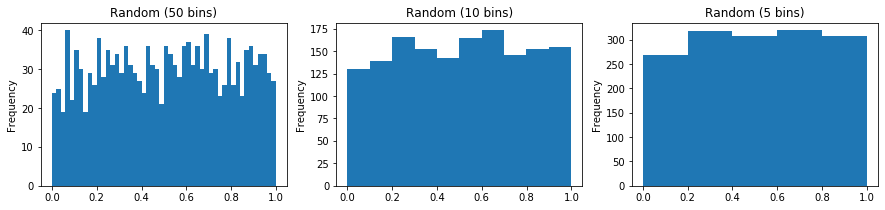

In [21]:
df = rawData.copy()
df = df["random"]
print("Mean: " + str(df.mean()))
print("Median: " + str(df.median()))
print("Mode: " + str(df.mode()[0]))
print("Std: " + str(df.std()))


plt.figure(figsize=(15,3))
plt.subplot(1, 3, 1)
df.plot(kind='hist',title='Random (50 bins)', bins=50) ## Extra bins.

plt.subplot(1, 3, 2)
df.plot(kind='hist',title='Random (10 bins)') ## Default bins.

plt.subplot(1, 3, 3)
df.plot(kind='hist',title='Random (5 bins)', bins=5) ## Reduced bins

plt.show()


Whilst it isn't unique, the plateu/random histogram and similarities of the different averages supports that it is random, which means it should add little-no value to any classifications.

- <p style="color: red">Remove random as feature when training.</p>

In [22]:
actions.append("cleanData = cleanData.drop(columns=['random']) ## Remove 'random' feature.")

INDICATION:

    Expected: 1 to 4
    Actual: 5
    
    
Review unique values in the indication column:

In [23]:
df = rawData.copy()
df = df["indication"]
df.unique()

array(['A-F', 'TIA', 'CVA', 'ASx', 'Asx', nan], dtype=object)

In [24]:
print("ASx count: " + str(len(df[df == "ASx"])))
print("Asx count: " + str(len(df[df == "Asx"])))

ASx count: 186
Asx count: 32


In [25]:
df = rawData.copy()
df.groupby(["label", "indication"], group_keys=False).size()

label    indication
NoRisk   A-F           290
         ASx           113
         CVA           279
         TIA           325
Risk     A-F           203
         ASx            72
         Asx            32
         CVA           134
         TIA            64
Unknown  ASx             1
         CVA             1
dtype: int64

The data dictionary provides 4 classes for the indication feature, but there are 5.

ASx and Asx could potentially be 2 separate classes, considering that neither value is a one-off and the above *groupby()* actually finds that **all** "Asx" instances are in the Risk class. Given the dictionary, I'll assume human error for now.

- <p style="color: red">Treat the 2 'asx' variations as the same; convert all values to lowercase.</p>

actions.append("cleanData['indication'] = cleanData['indication'].apply(lambda x: str(x).lower()) ## Convert 'indications' to lower case.")

LABEL:

    Expected: 1 to 2
    Actual: 3

In [26]:
df = rawData.copy()
df = df["label"]
df.unique()

array(['NoRisk', 'Risk', 'Unknown', nan], dtype=object)

In [27]:
indexes = df[df == "Unknown"].index.values
print("Unknown count: " + str(len(df[df == "Unknown"])))
print("Indexes: " + str(indexes))

Unknown count: 2
Indexes: [475 523]


The data dictionary provides 2 classes for the label feature (risk, norisk), but there are 3 (excluding nan).

Since the purpose of the end model will be to predict risk or no-risk, and since there are only 2 "unknown" classifications, it makes most sense to remove these records as they are not represented well enough to understand further. 

The label could be imputed, but there is not enough domain knowledge to justify this and the only 2 records should provide little-no benefit.

- <p style="color: red">Remove records classified as "unknown".</p>

In [28]:
actions.append("cleanData = cleanData.drop([475, 523]) ## Remove 'unknown' cases.")

<b>Expected Values</b>

There were unexpected values found in columns: indication, contra, label. Label and indication have been adressed in the previous section.

It is clear to see that contra was raised because the expected values are integers (as per the data dictionary), whilst actual values are strings.

Some of these strings are blank, which will need to be converted to nan and missing data will be re-evaluated.

In [29]:
df = rawData.copy()
df['contra'] = df['contra'].replace(r'^\s*$', np.nan, regex=True)
df['contra'] = df['contra'].apply(lambda x: float(x))
indexes = df["contra"][df["contra"].isna() == True].index.values
nNans = len(indexes)
print(str(nNans) + " additional nans created.")
if (nNans > 0):
    print("at indexes: " + str(indexes))

1 additional nans created.
at indexes: [453]


To begin with, remove the record.

- <p style="color: red">Convert blank-string values to nan.</p>
- <p style="color: red">Convert contra column to numeric.</p>
- <p style="color: red">Remove nan.</p>

In [30]:
actions.append("cleanData['contra'] = cleanData['contra'].replace(r'^\s*$', np.nan, regex=True) ## Convert 'contra' blanks to nan.") ## https://stackoverflow.com/a/21942746 [acessed 20/11/19]
actions.append("cleanData['contra'] = cleanData['contra'].apply(lambda x: float(x)) ## Convert 'contra' values to numbers.")
actions.append("cleanData = cleanData.dropna() ## Remove additional nan.")

<b>Expected Types</b>

The only non-conforming feature was contra, which was resolved in the previous section (converted from string to int).

<b>Other</b>

Since the id feature is unique to each patient and it hasn't been determined to contain session information, it can probably be dropped as it *shouldn't* correlate with any other features. This decision might be supported by a heatmap of correlations between features:

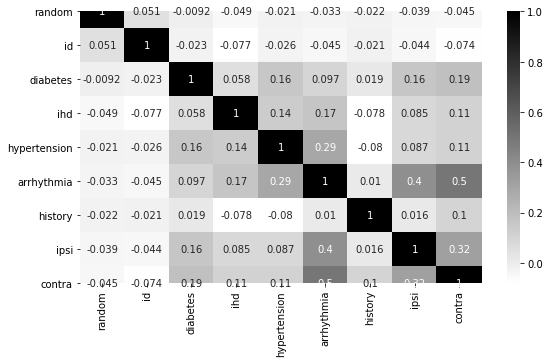

In [31]:
df = rawData.copy()

## Make all columns numeric
for col in df.columns.values:
    df = df.replace(["yes", "Risk", "no", "NoRisk"], [1, 1, 0, 0])
## Fix contra to be numeric too.
df['contra'] = df['contra'].replace(r'^\s*$', np.nan, regex=True)
df['contra'] = df['contra'].apply(lambda x: float(x))

correlations = df.corr()
plt.figure(figsize=(9,5))
sns.heatmap(correlations, annot=True, cmap="gist_yarg")

The heatmap suggests that there is some correlation between random and id, but not much else. Out of interest, create a scatter of these 2 continuous variables and set the hue to label to see distribution of label within ID:

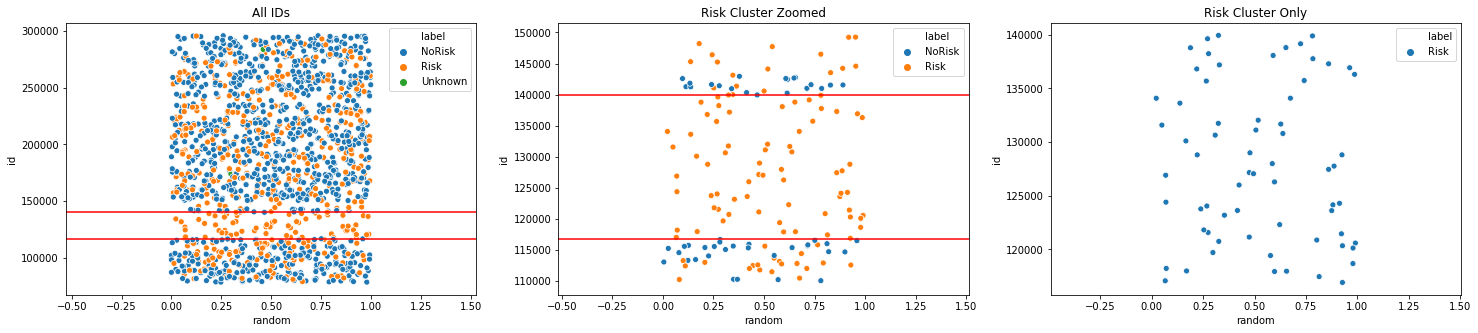

In [32]:
df = rawData.copy()

## All ids plotted against random.
plt.figure(figsize=(25,5))
plt.subplot(1,3,1,xmargin=0.5, title="All IDs")
plt.axhline(y=139960, color="red")
plt.axhline(y=116720, color="red")
sns.scatterplot(x="random", y="id", hue="label", data=df)

## PLot focused on the cluster - boundaries determined by observing previous plot.
df = df[df['id'] > 110000]
df = df[df['id'] < 150000]
plt.subplot(1,3,2,xmargin=0.5, title="Risk Cluster Zoomed")
plt.axhline(y=139960, color="red")
plt.axhline(y=116720, color="red")
sns.scatterplot(x="random", y="id", hue="label", data=df)

## Cluster only - boundaries determined by observing previous plot and iteratively reducing until no "norisk" data points.
df = df[df['id'] > 116720]
df = df[df['id'] < 139960]
plt.subplot(1,3,3,xmargin=0.5, title="Risk Cluster Only")
sns.scatterplot(x="random", y="id", hue="label", data=df)

There is a distinct cluster of IDs where all patients are at risk. This might a deliberate unhealthy cohort that were part of a study but it may might indicate errors with labelling the data set.


**Try removing this cluster** and  creating another heatmap to determine it's effects on correlations:

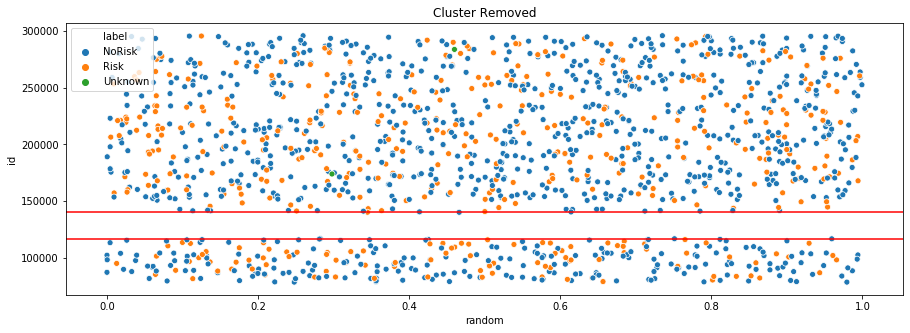

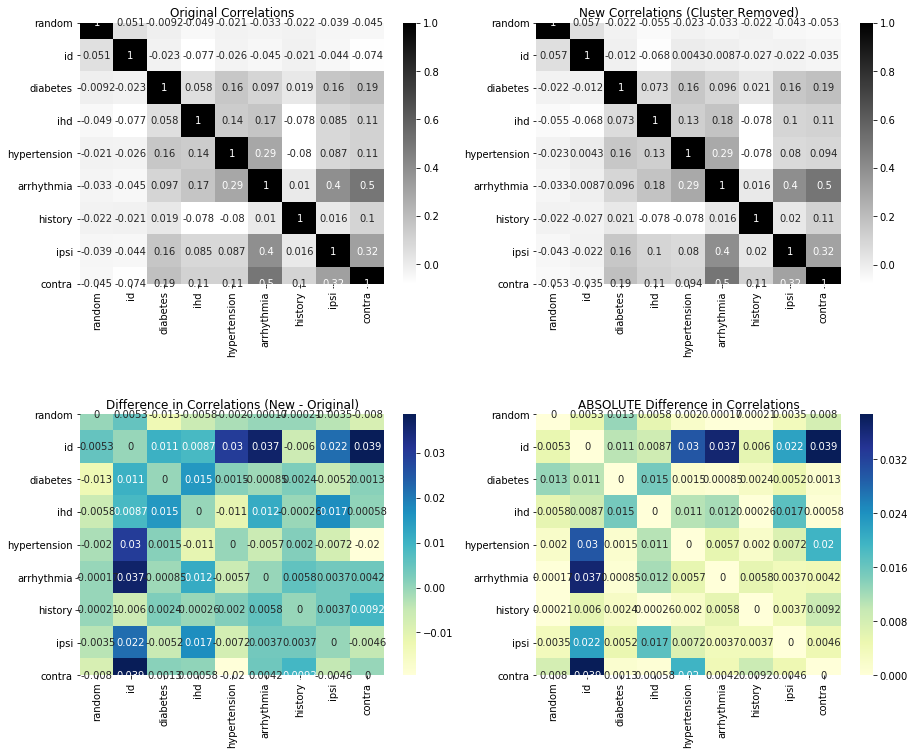

In [33]:
## Compare original correlations with when the id, "Risk" cluster is removed.

cluster = rawData.copy()
## Get the cluster indexes.
cluster = cluster[cluster["id"] > 116720]
cluster = cluster[cluster["id"] < 139960]
indexes = cluster.index.values

## Remove those indexes from the full df and plot modified scatter plot.
df = rawData.copy()
df = df.drop(indexes)
plt.figure(figsize=(15,5))
plt.title("Cluster Removed")
plt.axhline(y=139960, color="red")
plt.axhline(y=116720, color="red")
sns.scatterplot(x="random", y="id", hue="label", data=df)
plt.show();

##--
## Make all fields numeric so they're compatible with heatmap.
for col in df.columns.values:
    df = df.replace(["yes", "Risk", "no", "NoRisk"], [1, 1, 0, 0])
## Fix contra to be numeric too.
df['contra'] = df['contra'].replace(r'^\s*$', np.nan, regex=True)
df['contra'] = df['contra'].apply(lambda x: float(x))

## Plot the new heatmap and compare with the original.
plt.figure(figsize=(15,12))
plt.subplots_adjust(hspace=0.5)

## Original.
plt.subplot(2,2,1, title="Original Correlations")
sns.heatmap(correlations, annot=True, cmap="gist_yarg")

## New.
correlations2 = df.corr()
plt.subplot(2,2,2, title="New Correlations (Cluster Removed)")
sns.heatmap(correlations2, annot=True, cmap="gist_yarg")

## Change between original and new.
correlations3 = correlations2 - correlations
plt.subplot(2,2,3, title="Difference in Correlations (New - Original)")
sns.heatmap(correlations3, annot=True, cmap="YlGnBu")

## Absoluted change between original and new.
correlations3 = abs(correlations2 - correlations)
plt.subplot(2,2,4, title="ABSOLUTE Difference in Correlations")
sns.heatmap(correlations3, annot=True, cmap="YlGnBu")

There are no significant changes in univariate correlations when removing the cluster, so regardless of the the reasoning for it, its effect seems limited. However, looking at the features most affected features (in the "ABSOLUTE" heatmap) indicates **contra, arrythmia, and hypertension (possibly ihd and ipsi) *may* have quite a significant effect on the classificiation in  this cluster.**


To close the original discussion on the fate of the id feature, it seems (as would be expected) to contribute very little to the classification, so it can be be dropped initially.

- <p style="color: red">Drop id column.</p>

In [34]:
actions.append("cleanData = cleanData.drop(columns=['id']) ## Drop id column.")

<a href="#contents">[back to top]</a>

**Looking at the 'Risk' cluster more closely.**

Based on the the changes in correlation when the id cluster was removed, look at the affected features and see if their impact on classification is present in the full dataset.

In [35]:
## Fix contra to be numeric too.
cluster['contra'] = cluster['contra'].replace(r'^\s*$', np.nan, regex=True)
cluster['contra'] = cluster['contra'].apply(lambda x: float(x))

iah = cluster[["ihd","arrhythmia","hypertension"]]
iah.describe(include="all")

,ihd,arrhythmia,hypertension
count,66,66,66
unique,2,2,2
top,yes,yes,yes
freq,40,38,54


The most frequent values are positive for all 3 features. If we look at the frequency of the different combinations of these features, we may find a critical combination that indicates risk, which we can look for in the larger dataset.

In [36]:
iah.groupby(["arrhythmia", "hypertension"]).size()

arrhythmia  hypertension
no          no               5
            yes             23
yes         no               7
            yes             31
dtype: int64

This suggests that hypertension is the most significant feature in this subset, and risk is increased further when arrythmia and hypertension are combined.

In [37]:
iah.groupby(["ihd", "arrhythmia", "hypertension"]).size()

ihd  arrhythmia  hypertension
no   no          no               2
                 yes              6
     yes         no               6
                 yes             12
yes  no          no               3
                 yes             17
     yes         no               1
                 yes             19
dtype: int64

Combinations of positive ("yes") ihd and and hypertension seem to have a similar effect to pairing hypertension with arrhythmia, and slightly increase risk when all three features are positive.

To rank them (in this sample):
    0. i a h
    1. y y y = 19
    2. y n y = 17
    3. n y y = 12
    
    sum = 48
    total "risk" cases = 66
    % = 72.73

With this in mind, we can look in the full data set to see if a similar pattern exists:

In [38]:
iah = rawData.copy()
iah = iah[["label", "ihd","arrhythmia","hypertension"]]
iah = iah[iah["label"] == "Risk"]
# df = df.drop(columns=["label"])

iah.describe()

,label,ihd,arrhythmia,hypertension
count,507,507,507,506
unique,1,2,2,2
top,Risk,yes,yes,yes
freq,507,329,318,381


In [39]:
iah.groupby(["arrhythmia", "hypertension"]).size()

arrhythmia  hypertension
no          no               48
            yes             141
yes         no               77
            yes             240
dtype: int64

In [40]:
iah.groupby(["ihd", "arrhythmia", "hypertension"]).size()

ihd  arrhythmia  hypertension
no   no          no               22
                 yes              40
     yes         no               36
                 yes              79
yes  no          no               26
                 yes             101
     yes         no               41
                 yes             161
dtype: int64

Ranked:
    0. i a h
    1. y y y = 161
    2. y n y = 101
    3. n y y = 79

    sum = 341
    total "risk" cases = 507
    % = 67.26

It seems that these patterns make up around 70% of positive cases ((100 / total) * sum) in both the cluster subset and the whole dataset. **They might be good features to include in any models.**

What we haven't check are ipsi and contra; they're numeric variable so we can't plot the mode class without binning them.

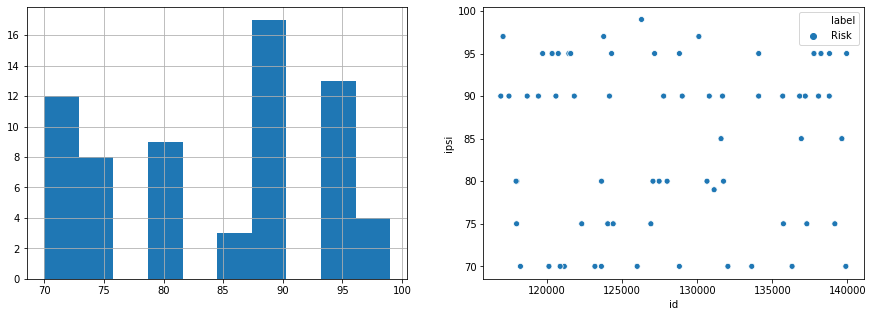

In [41]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
cluster["ipsi"].hist()

plt.subplot(1,2,2)
sns.scatterplot(x="id", y="ipsi", hue="label", data=cluster)

At first, the lack of an overwhelming mode or any real clustering supports the original statement of, "possibly ihd and ipsi". Actually, we see that all ipsi values range from 70 to 100, which might be a indicative of a classification boundary in the full data set: 

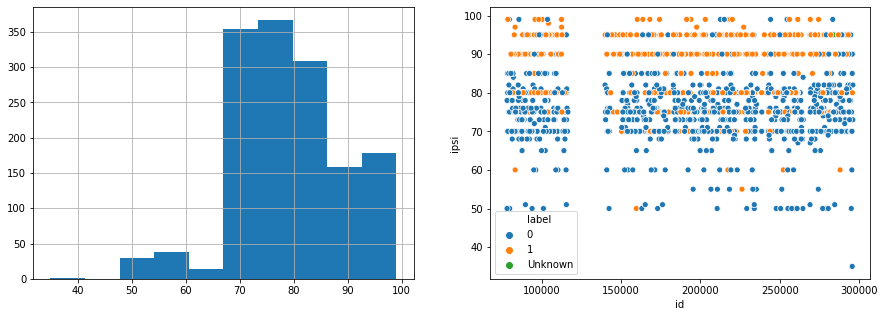

In [42]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df["ipsi"].hist()

plt.subplot(1,2,2)
sns.scatterplot(x="id", y="ipsi", hue="label", data=df)

In the rest of the data, we see that most of the risk points are above 70 as in the risk-cluster, but the whole distribution is a little wider, with potential outliers below ~70.

This might suggest a poorly representative data set or that ipsi becomes a more telling feature at higher values - i.e. there a greater chance a person is at risk  over 90%, but at 80% it's hard to say.

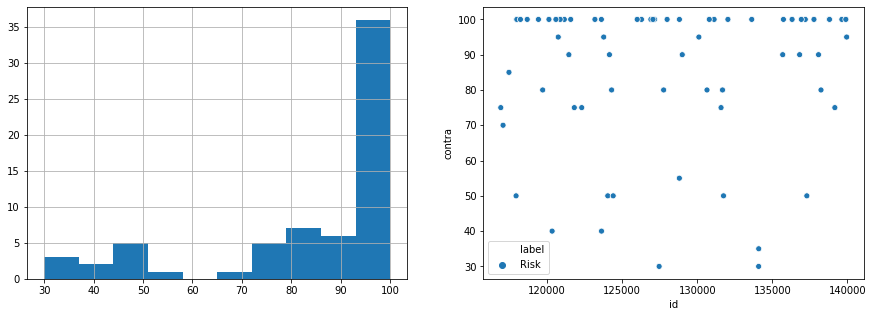

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
cluster["contra"].hist()

plt.subplot(1,2,2)
sns.scatterplot(x="id", y="contra", hue="label", data=cluster)

Unlike ipsi, contra exhibits a sharper skew towards  the upper range, indicating that contra is quite a significant indicator of risk in the cluster.

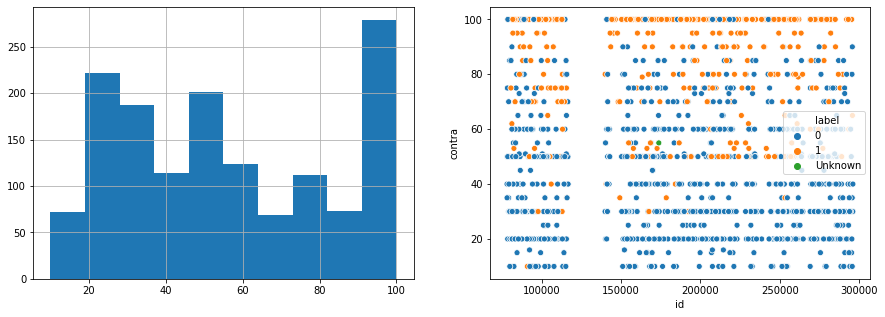

In [44]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df["contra"].hist()

plt.subplot(1,2,2)
sns.scatterplot(x="id", y="contra", hue="label", data=df)

Whilst there is a clear correlation towards higher contra values indicating a grater risk, it's only at the extremes wehre there is a very clear separation.

In [45]:
## Some notes for data cleaning and modeling.
actions.append("Include ihd, hypertension, contra, ipsi, and arrhythmia in models")
actions.append("Consider an aggregate features of ihd, hypertension, contra, ipsi, and arrythmia")

<a href="#contents">[back to top]</a>

<a id="123"></a>
<h4>1.2.3. Data Distribution</h4>
Plot data distribution for each feature to gain insight into the class balance, outliers and any other patterns.

In [46]:
def PlotClassAndClassificationDistribution(dataframe,col,xCol, categoric=False):
    for df in [dataframe, dataframe[dataframe["label"] == "Risk"], dataframe[dataframe["label"] == "NoRisk"]]:
        ## Create histogram on left to show distribution of values for this feature 'col'.
        plt.figure(figsize=(15,3))
        plt.subplot(1, 2, 1, title=col.upper() + " Value Distributon")
        df[col].hist()


        ## Create a scatter plot where yaxis = 'col' feature and xaxis = xCol (random or id to spread data points).
        plt.subplot(1, 2, 2, title="Classification Distributon for " + col.upper())
        ## If plotting againts id, highlight risk-cluster
        if (xCol == "id"):
            plt.axvline(x=116720, color="red")
            plt.axvline(x=139960, color="red")
        sns.scatterplot(x=xCol, y=col, hue="label", data=df) ## hue == label so that class distribution within a feature is visible.

        plt.show()
    
        ## If includDescription == true, use df.describe() to calculate stats on each feature category.
        if (categoric):
            ## Print data description statistics.
            categories = df[col].unique() 
            for category in categories:
                cat = cleanedDf[cleanedDf[col] == category]
                description = cat["label"].describe()
                try:
                    percent =  round((100/description["count"]) * description["freq"],2)
                    if (np.isnan(percent)):
                        print("Skipped nans...")
                        continue

                    print("Category: " + str(category))
                    print(description)
                    print("% of most frequent: " + str(percent) + "\n")
                except:
                    pass ## Div by 0 (nan)
        else:
            if col != "id" and col != "random":
                print(df[[col, "label"]].describe()) ## Not categoric, so just describe whole series, not each unique value ('category') as above.

**Indication Distribution**

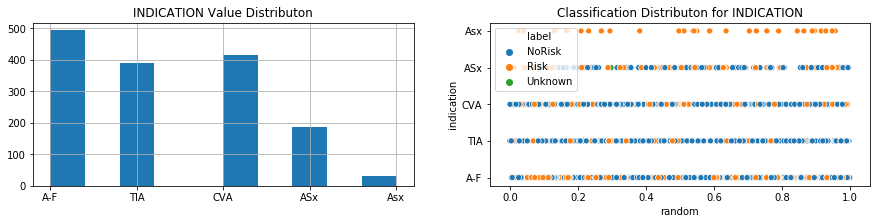

       indication   label
count        1517    1517
unique          5       3
top           A-F  NoRisk
freq          493    1008


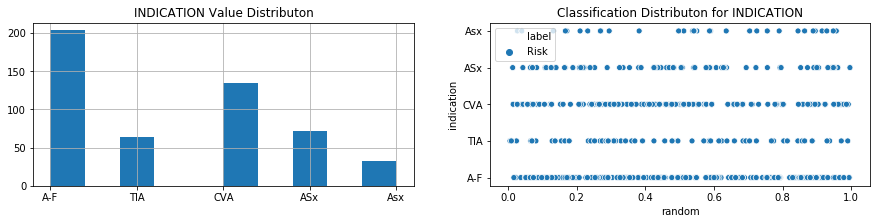

       indication label
count         505   507
unique          5     1
top           A-F  Risk
freq          203   507


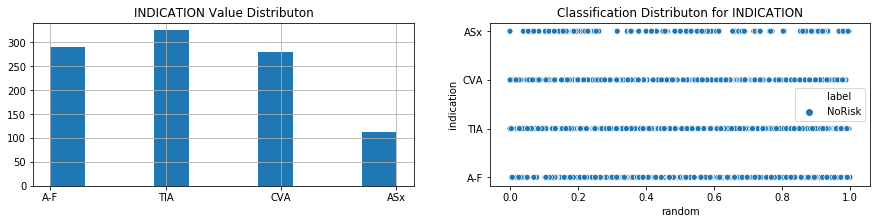

       indication   label
count        1007    1008
unique          4       1
top           TIA  NoRisk
freq          325    1008


In [47]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "indication", "random")

The distribution of ASx vs Asx has been explored already, with a decided action to merge the 2 classes to begin with.


I also noticed here that the x axis could be id (for the purpose of spreading the data points) and modified the PlotClassAndClassificationDistribution() method to accept another parameter, "xCol".

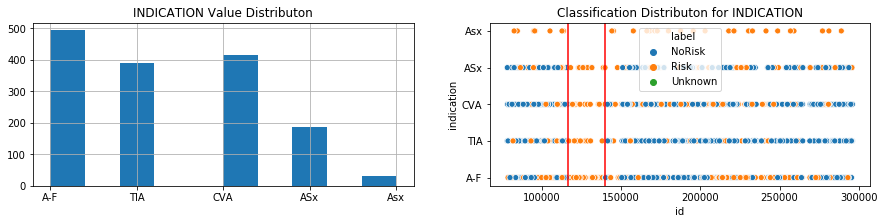

       indication   label
count        1517    1517
unique          5       3
top           A-F  NoRisk
freq          493    1008


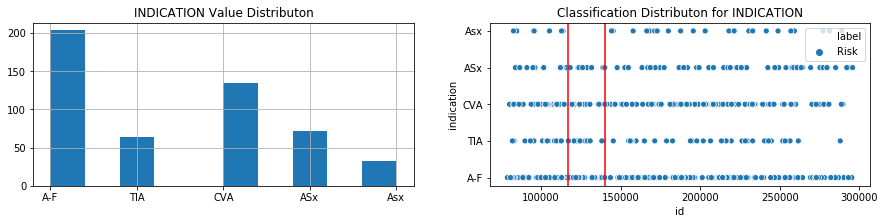

       indication label
count         505   507
unique          5     1
top           A-F  Risk
freq          203   507


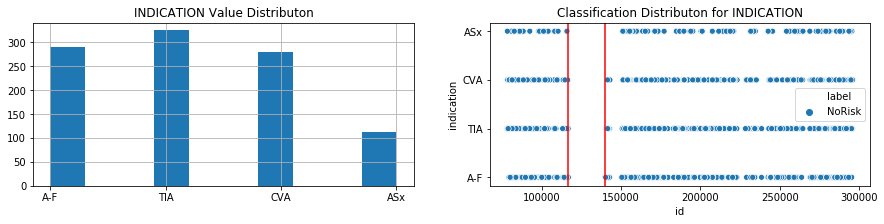

       indication   label
count        1007    1008
unique          4       1
top           TIA  NoRisk
freq          325    1008


In [48]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "indication", "id")

Switching the x axis to id from random has quite an important effect in seemingly grouping clusters of classifications. Referring back to the data dictionary, it said that the random attribute was used for sorting, but looking at this scatterplot above it may be the case that id is used to sort.

Interestingly, the grouping is also indicative of ids distribution, where its troughs line up to Risk clusters in the scatter:

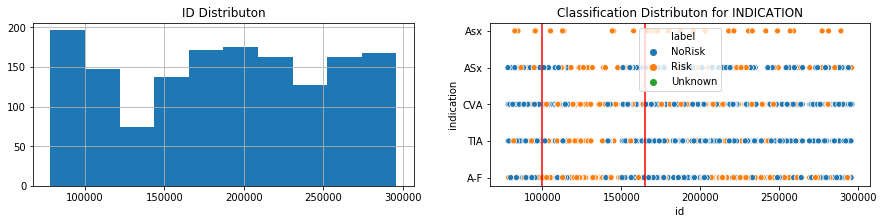

In [49]:
plt.figure(figsize=(15,3))
plt.subplot(1, 2, 1, title="ID Distributon")
df["id"].hist()

plt.subplot(1, 2, 2, title="Classification Distributon for INDICATION")
plt.axvline(x=100000, color="red")
plt.axvline(x=165000, color="red")
sns.scatterplot(x="id", y="indication", hue="label", data=df)

plt.show()

Besides helping with visualisation, we still don't know enough about the id columns true meaning. One thing we can be fairly sure of is that it would still be a bad feature to include in any models, as it isn't "standard" feature; i.e. the process for assigning ids will be unique compared to determining if someone is diabetic or not. Therefore, while the model might acheive great results using some combination of ID, it'd most likely fail given future, real world data. 

Back to looking at indication; inspect with ASx/Asx combined as well as per previous discussion:

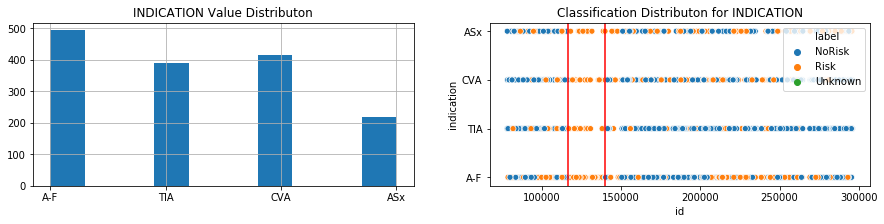

Category: A-F
count        493
unique         2
top       NoRisk
freq         290
Name: label, dtype: object
% of most frequent: 58.82

Category: TIA
count        389
unique         2
top       NoRisk
freq         325
Name: label, dtype: object
% of most frequent: 83.55

Category: CVA
count        414
unique         3
top       NoRisk
freq         279
Name: label, dtype: object
% of most frequent: 67.39

Category: ASx
count        218
unique         3
top       NoRisk
freq         113
Name: label, dtype: object
% of most frequent: 51.83

Skipped nans...


c:\users\zak\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in long_scalars


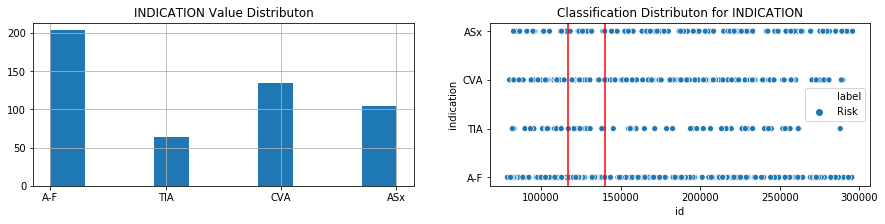

Category: A-F
count        493
unique         2
top       NoRisk
freq         290
Name: label, dtype: object
% of most frequent: 58.82

Category: TIA
count        389
unique         2
top       NoRisk
freq         325
Name: label, dtype: object
% of most frequent: 83.55

Category: CVA
count        414
unique         3
top       NoRisk
freq         279
Name: label, dtype: object
% of most frequent: 67.39

Category: ASx
count        218
unique         3
top       NoRisk
freq         113
Name: label, dtype: object
% of most frequent: 51.83

Skipped nans...


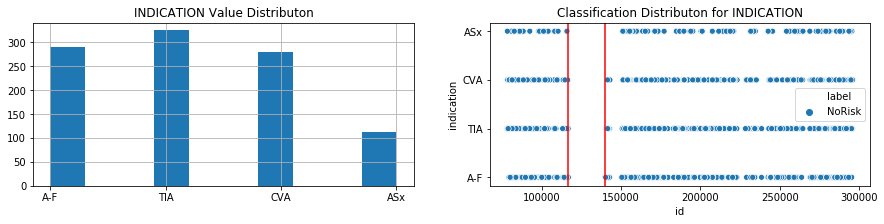

Category: A-F
count        493
unique         2
top       NoRisk
freq         290
Name: label, dtype: object
% of most frequent: 58.82

Category: TIA
count        389
unique         2
top       NoRisk
freq         325
Name: label, dtype: object
% of most frequent: 83.55

Category: CVA
count        414
unique         3
top       NoRisk
freq         279
Name: label, dtype: object
% of most frequent: 67.39

Category: ASx
count        218
unique         3
top       NoRisk
freq         113
Name: label, dtype: object
% of most frequent: 51.83

Skipped nans...


In [50]:
cleanedDf = rawData.copy()
cleanedDf = cleanedDf.replace(["Asx"], ["ASx"]) ## Change Asx to ASx so there is a single asx class.
PlotClassAndClassificationDistribution(cleanedDf, "indication", "id", True)

This visualisation suggests that id is more significant in classifying the Risk status than the indication itself. 

The description indicates that **TIA possibly reduces the chance a person is classified as being at risk**. This is similar for CVA too, although not as pronounced, whilst ASx and A-F appear to have little effect either way.

In [51]:
## Some notes for data cleaning and modeling.
actions.append("Pateints with a classification of TIA (and CVA, less-so) appear to be at reduced risk.")

**Diabetes Distribution**

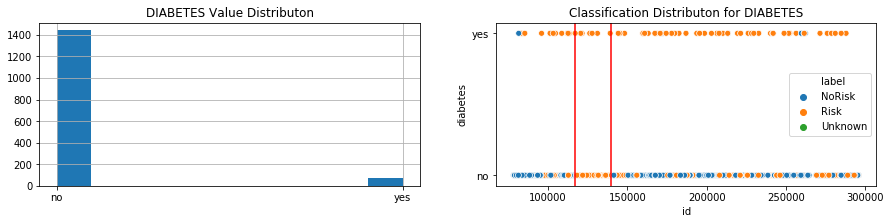

Category: no
count       1439
unique         3
top       NoRisk
freq        1001
Name: label, dtype: object
% of most frequent: 69.56

Category: yes
count       76
unique       2
top       Risk
freq        70
Name: label, dtype: object
% of most frequent: 92.11

Skipped nans...


c:\users\zak\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in long_scalars


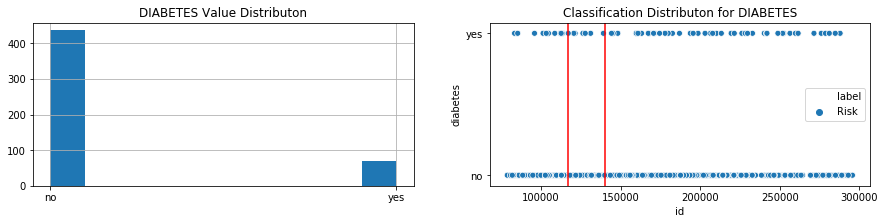

Category: no
count       1439
unique         3
top       NoRisk
freq        1001
Name: label, dtype: object
% of most frequent: 69.56

Category: yes
count       76
unique       2
top       Risk
freq        70
Name: label, dtype: object
% of most frequent: 92.11

Skipped nans...


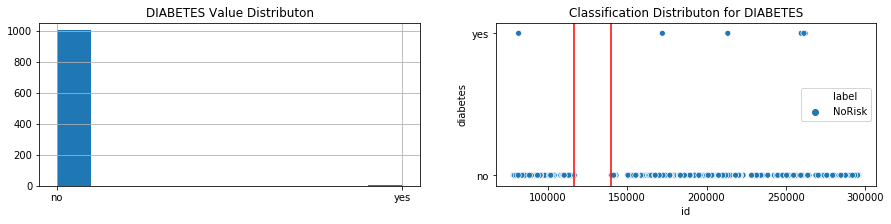

Category: no
count       1439
unique         3
top       NoRisk
freq        1001
Name: label, dtype: object
% of most frequent: 69.56

Category: yes
count       76
unique       2
top       Risk
freq        70
Name: label, dtype: object
% of most frequent: 92.11

Skipped nans...


In [52]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "diabetes", "id", True)

In [53]:
tempDf = df.copy()
nDiabAndRisk = tempDf[tempDf["diabetes"] == "yes"]
nDiabAndRisk = len(nDiabAndRisk[nDiabAndRisk["label"] == "Risk"])

nNotDiabAndRisk = tempDf[tempDf["diabetes"] == "no"]
nNotDiabAndRisk = len(nNotDiabAndRisk[nNotDiabAndRisk["label"] == "Risk"])

print("Diabetes & Risk: " + str(nDiabAndRisk))
print("NoDiabetes & Risk: " + str(nNotDiabAndRisk))

Diabetes & Risk: 70
NoDiabetes & Risk: 436


Although the majority of diabetes sufferers are classified as being at risk (92.11%), diabetics are very poorly represented within the dataset, to the extent that non-diabetics have more patients classified as at risk. If better represented (more equally distributed between diabetes yes/no), diabetes might be a good indicator of risk. This claim can be supported with the following code.

To measure the effect of the imbalance, the following code takes a sample half the size of the number of "yes" cases for diabetes and records the lowest and highest percentages of the mode class.

In [54]:
nIterations = 1000
noLowest = 100
noHighest = 0
lastTop = ""

dfTemp = rawData.copy()
arrNoDf = dfTemp[dfTemp["diabetes"] == "no"]
sampleSize = int(len(dfTemp[dfTemp["diabetes"] == "yes"]) / 2)

for i in range(nIterations):
    arrNo = arrNoDf.sample(sampleSize, random_state=i) ## Set random state for consistent results
    arrNoDesc = arrNo["label"].describe()
    top = arrNoDesc["top"]
    if (top != lastTop):
        lastTop = top
        if (i != 0):
            print("Mode class changed at iteration " + str(i) + ": " + lastTop)
    noPerc = (100/sampleSize) * len(arrNo[arrNo["label"] == arrNoDesc["top"]])
    
    if (noPerc < noLowest):
        noLowest = noPerc
    if (noPerc > noHighest):
        noHighest = noPerc
    
print("After " + str(nIterations) + " iterations:\n")
print(arrNo["label"].describe())
print(str(round(noPerc,2)))
print("Lowest: " + str(noLowest))
print("Highest: " + str(noHighest))

Mode class changed at iteration 41: Risk
Mode class changed at iteration 42: NoRisk
Mode class changed at iteration 253: Risk
Mode class changed at iteration 254: NoRisk
Mode class changed at iteration 589: Risk
Mode class changed at iteration 590: NoRisk
Mode class changed at iteration 773: Risk
Mode class changed at iteration 774: NoRisk
After 1000 iterations:

count         38
unique         2
top       NoRisk
freq          29
Name: label, dtype: object
76.32
Lowest: 50.0
Highest: 94.73684210526316


**With such an imbalance it's better to omit this feature**. Theres almost a 20% change between the distribrution of the full dataset and the lowest percentage in a sample size and the range between the highest and lowest is over 45.

In [55]:
## Some notes for data cleaning and modeling.
actions.append("Drop diabetes column; the dataset is too imbalanced towards non-diabetics.")

**IHD Distribution**

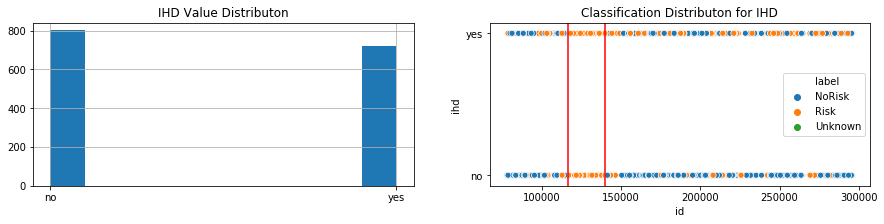

Category: no
count        800
unique         3
top       NoRisk
freq         621
Name: label, dtype: object
% of most frequent: 77.62

Category: yes
count        717
unique         3
top       NoRisk
freq         387
Name: label, dtype: object
% of most frequent: 53.97



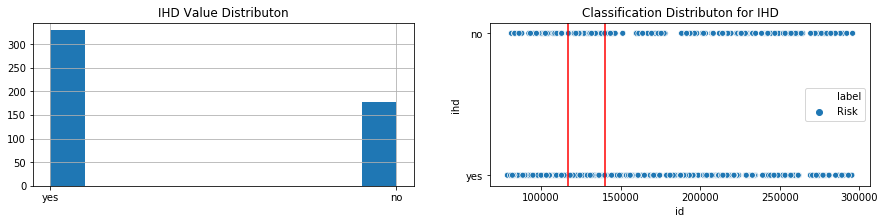

Category: yes
count        717
unique         3
top       NoRisk
freq         387
Name: label, dtype: object
% of most frequent: 53.97

Category: no
count        800
unique         3
top       NoRisk
freq         621
Name: label, dtype: object
% of most frequent: 77.62



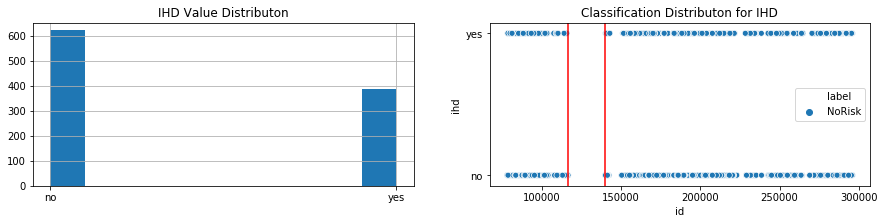

Category: no
count        800
unique         3
top       NoRisk
freq         621
Name: label, dtype: object
% of most frequent: 77.62

Category: yes
count        717
unique         3
top       NoRisk
freq         387
Name: label, dtype: object
% of most frequent: 53.97



In [56]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "ihd", "id", True)

These plots and stats demonstrate that there is a relative increase in risk when the ihd feature is equal to 'yes', when compared to it being 'no'. However, it's almost a 50:50 split even then. This mirrors the earlier exploration of ihd **combined** with hypertension but meaning little by itself. It's possible that ihd, is a secondary symptom.

**Hypertension Distribution**

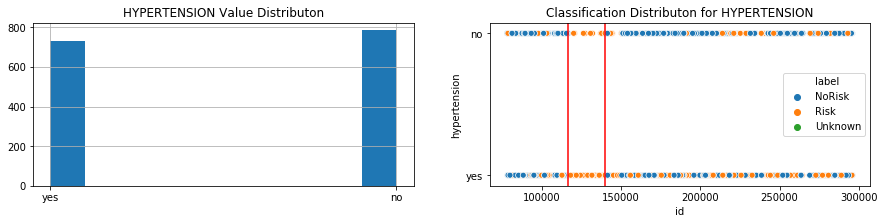

Category: yes
count      731
unique       3
top       Risk
freq       381
Name: label, dtype: object
% of most frequent: 52.12

Category: no
count        783
unique         2
top       NoRisk
freq         658
Name: label, dtype: object
% of most frequent: 84.04

Skipped nans...


c:\users\zak\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in long_scalars


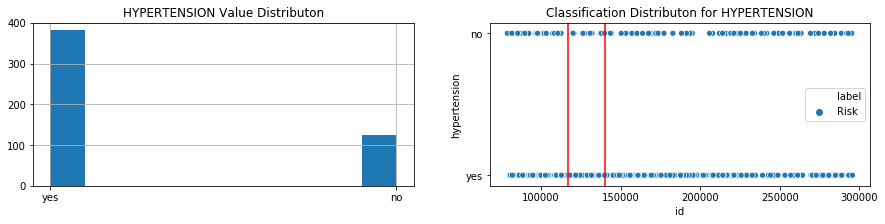

Category: yes
count      731
unique       3
top       Risk
freq       381
Name: label, dtype: object
% of most frequent: 52.12

Category: no
count        783
unique         2
top       NoRisk
freq         658
Name: label, dtype: object
% of most frequent: 84.04

Skipped nans...


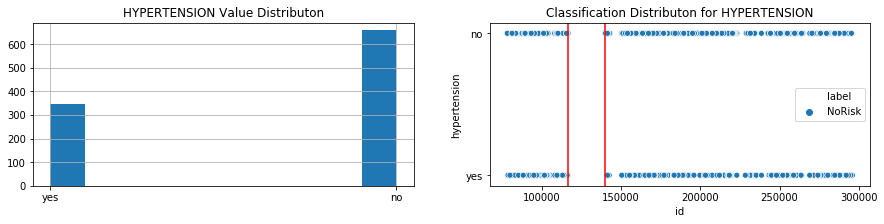

Category: yes
count      731
unique       3
top       Risk
freq       381
Name: label, dtype: object
% of most frequent: 52.12

Category: no
count        783
unique         2
top       NoRisk
freq         658
Name: label, dtype: object
% of most frequent: 84.04

Skipped nans...


In [57]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "hypertension", "id", True)

The take-away here is very similar to that of the ihd feature and supports the earlier combinations of hypertension and ihd.

**Arrhythmia Distribution**

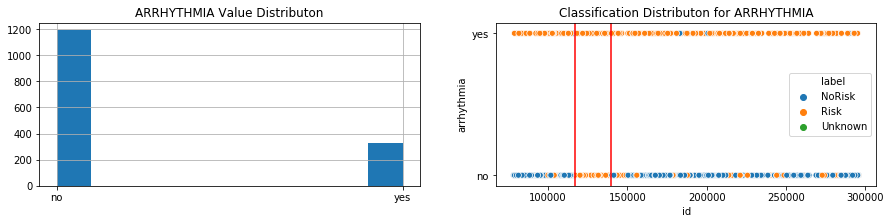

Category: no
count       1188
unique         3
top       NoRisk
freq         998
Name: label, dtype: object
% of most frequent: 84.01

Category: yes
count      329
unique       3
top       Risk
freq       318
Name: label, dtype: object
% of most frequent: 96.66



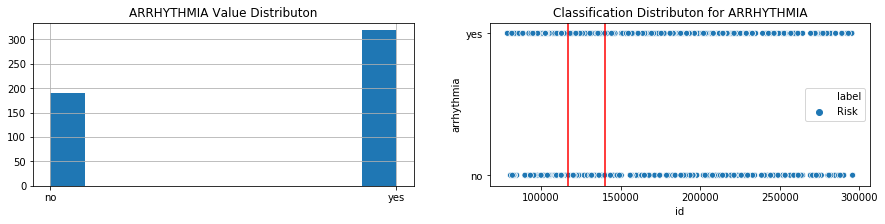

Category: no
count       1188
unique         3
top       NoRisk
freq         998
Name: label, dtype: object
% of most frequent: 84.01

Category: yes
count      329
unique       3
top       Risk
freq       318
Name: label, dtype: object
% of most frequent: 96.66



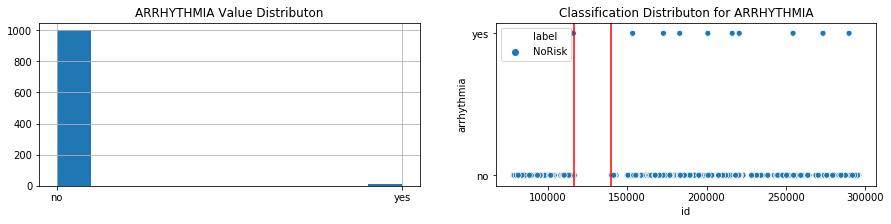

Category: no
count       1188
unique         3
top       NoRisk
freq         998
Name: label, dtype: object
% of most frequent: 84.01

Category: yes
count      329
unique       3
top       Risk
freq       318
Name: label, dtype: object
% of most frequent: 96.66



In [58]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "arrhythmia", "id", True)

The data above shows that there's a 16% chance a patient is at risk when they don't have arrhythmia, and a 96% chance they are at risk if they do. Although not as severe as diabetes, there is still a significant class imbalance here.

To measure the effect of the imbalance, the following code takes a sample half the size of the number of "yes" cases for arrhythmia and records the lowest and highest percentages of the mode class. This is of course random and introduces some uncertainty, but  if the variation isn't too significant, it may be worth keeping arrhythmia as a feature.

In [59]:
nIterations = 1000
noLowest = 100
noHighest = 0
lastTop = ""

dfTemp = rawData.copy()
arrNoDf = dfTemp[dfTemp["arrhythmia"] == "no"]
sampleSize = int(len(dfTemp[dfTemp["arrhythmia"] == "yes"]) / 2)

for i in range(nIterations):
    arrNo = arrNoDf.sample(sampleSize, random_state=i) ## Set random state for consistent results
    arrNoDesc = arrNo["label"].describe()
    top = arrNoDesc["top"]
    if (top != lastTop):
        lastTop = top
        if (i != 0):
            print("Mode class changed at iteration " + str(i) + ": " + lastTop)
    noPerc = (100/sampleSize) * len(arrNo[arrNo["label"] == arrNoDesc["top"]])
    
    if (noPerc < noLowest):
        noLowest = noPerc
    if (noPerc > noHighest):
        noHighest = noPerc
    
print("After " + str(nIterations) + " iterations:\n")
print(arrNo["label"].describe())
print(str(round(noPerc,2)))
print("Lowest: " + str(noLowest))
print("Highest: " + str(noHighest))

After 1000 iterations:

count        164
unique         3
top       NoRisk
freq         138
Name: label, dtype: object
83.64
Lowest: 76.36363636363636
Highest: 92.12121212121212


This is still a good class separation without variation too drastic, so we can try keeping arrhythmia with *some* confidence.

In [60]:
## Some notes for data cleaning and modeling.
actions.append("Arrhythmia is quite imbalanced but seems to be fairly reliable still.")

**History Distribution**

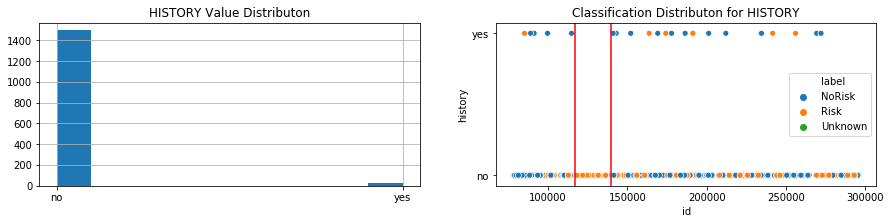

Category: no
count       1492
unique         3
top       NoRisk
freq         992
Name: label, dtype: object
% of most frequent: 66.49

Category: yes
count         23
unique         2
top       NoRisk
freq          15
Name: label, dtype: object
% of most frequent: 65.22

Skipped nans...


c:\users\zak\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in long_scalars


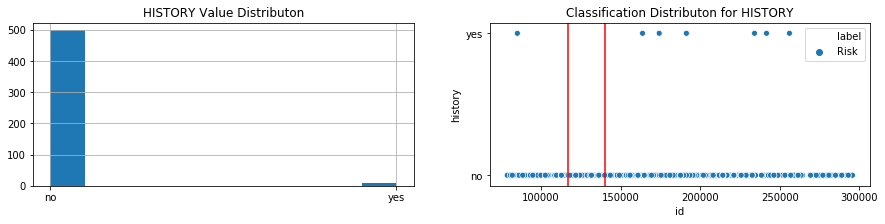

Category: no
count       1492
unique         3
top       NoRisk
freq         992
Name: label, dtype: object
% of most frequent: 66.49

Category: yes
count         23
unique         2
top       NoRisk
freq          15
Name: label, dtype: object
% of most frequent: 65.22

Skipped nans...


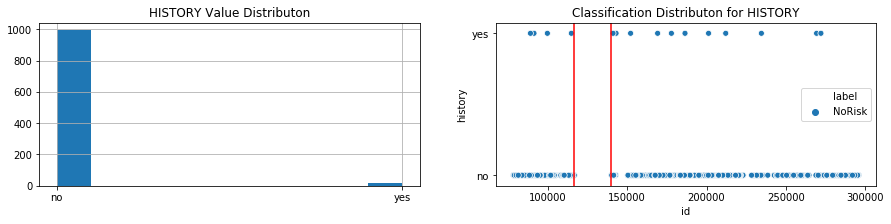

Category: no
count       1492
unique         3
top       NoRisk
freq         992
Name: label, dtype: object
% of most frequent: 66.49

Category: yes
count         23
unique         2
top       NoRisk
freq          15
Name: label, dtype: object
% of most frequent: 65.22

Skipped nans...


In [61]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "history", "id", True)

The class imbalance is enourmous here and the class split is very weak, so history will not be used.

In [62]:
actions.append("Drop history - the class imbalance and seperation is very poor.")

**Ipsi Distribution**

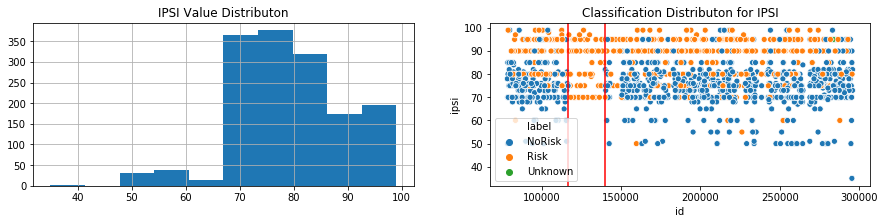

              ipsi
count  1516.000000
mean     78.872032
std      10.162351
min      35.000000
25%      73.000000
50%      77.000000
75%      85.000000
max      99.000000


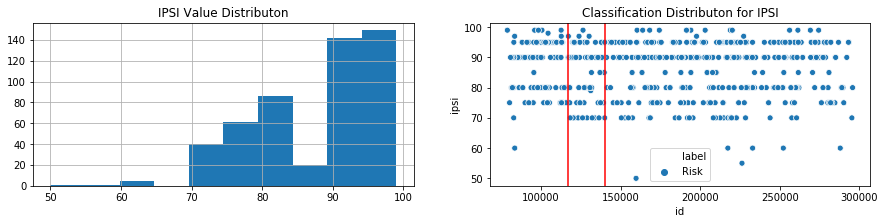

             ipsi
count  505.000000
mean    85.932673
std      9.209177
min     50.000000
25%     80.000000
50%     90.000000
75%     95.000000
max     99.000000


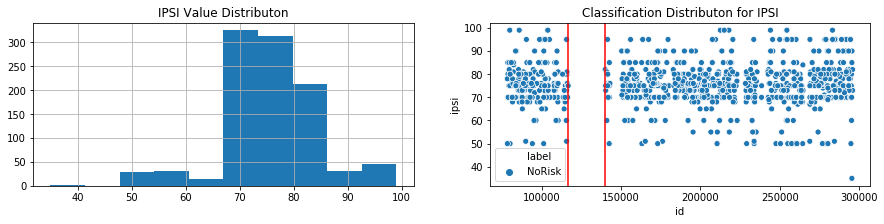

              ipsi
count  1006.000000
mean     75.311133
std       8.656612
min      35.000000
25%      70.000000
50%      75.000000
75%      80.000000
max      99.000000


In [63]:
df = rawData.copy()
PlotClassAndClassificationDistribution(df, "ipsi", "id", False)

Here we see a potential, negative effect of *not* removing the id cluster that was discovered earlier. Where there is otherwise a good class seperation between lower and higher ipsi values, there is a distinct vertical column of patients at risk with disregard for this pattern.

In [64]:
actions.append("the right skey in ipsi distribution causes some concern as there are obivously data points in the lower regions - these may not be a real world representation and we can't check")

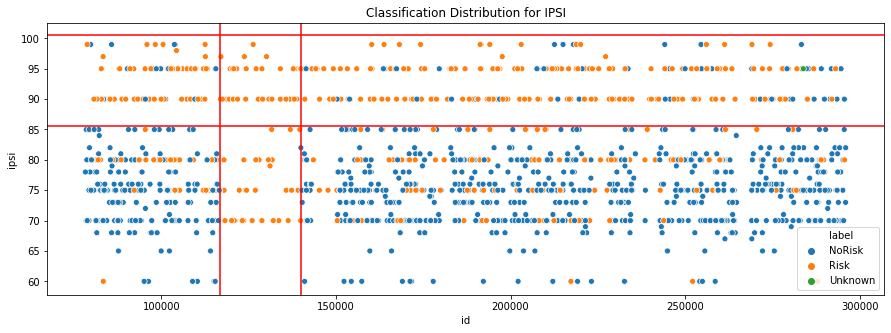

In [65]:
tempDf = rawData.copy()
ipsiFocus = tempDf[tempDf["ipsi"] > 55]
plt.figure(figsize=(15,5))
plt.axhline(y=85.5, color="red")
plt.axhline(y=100.5, color="red")
plt.axvline(x=116720, color="red")
plt.axvline(x=139960, color="red")
plt.title("Classification Distribution for IPSI")
sns.scatterplot(x="id", y="ipsi", hue="label", data=ipsiFocus)

By setting some boundaries for "low" and "high" ipsi, we can look at the percentage of risk and norisk classifications in each group.

We can also evaluate the effect that this id-risk cluster has.

In [66]:
# ////// REMOVE THE ID RISK CLUSTER
cluster = rawData.copy()
## Get the cluster indexes.
cluster = cluster[cluster["id"] > 116720]
cluster = cluster[cluster["id"] < 139960]
indexes = cluster.index.values

## Remove those indexes from the full df and plot modified scatter plot.
droppedClusters = rawData.copy()
droppedClusters = droppedClusters.drop(indexes)
# //////

i = 0
for idf in [df, droppedClusters]:
    if (i == 0):
        title = " RAW:"
    else:
        title = " WITH RISK CLUSTER REMOVED:"
    i+=1
        
    print("HIGH IPSI" + title)
    highIpsi = idf[idf["ipsi"] > 85]
    description = highIpsi["label"].describe()
    try:
        percent =  round((100/description["count"]) * description["freq"],2)
        if (np.isnan(percent)):
            print("Skipped nans...")

        print(description)
        print("% of most frequent: " + str(percent) + "\n")
    except:
        pass ## Div by 0 (nan)


    print("LOW IPSI" + title)
    lowIpsi = idf[idf["ipsi"] <= 85]
    description = lowIpsi["label"].describe()
    try:
        percent =  round((100/description["count"]) * description["freq"],2)
        if (np.isnan(percent)):
            print("Skipped nans...")

        print(description)
        print("% of most frequent: " + str(percent) + "\n")
    except:
        pass ## Div by 0 (nan)

HIGH IPSI RAW:
count      370
unique       3
top       Risk
freq       291
Name: label, dtype: object
% of most frequent: 78.65

LOW IPSI RAW:
count       1143
unique         3
top       NoRisk
freq         928
Name: label, dtype: object
% of most frequent: 81.19

HIGH IPSI WITH RISK CLUSTER REMOVED:
count      336
unique       3
top       Risk
freq       257
Name: label, dtype: object
% of most frequent: 76.49

LOW IPSI WITH RISK CLUSTER REMOVED:
count       1111
unique         3
top       NoRisk
freq         928
Name: label, dtype: object
% of most frequent: 83.53



Interestingly, the effect of removing the risk cluster is almost negligable. It understandably reduces the accuracy (of predicting "Risk" if ipsi is high) in the "high" group since it removes some supporting data points, and likewise improves the accuracy of the lower group since it was falsely  inserting "risk" data points before. It may still be okay to keep those data points.

In [67]:
actions.append("MAYBE include ipsi")
actions.append("Test model with and without the 'Risk cluster' - effect seems negligable in distribution but models may suffer in practice.")

As numeric feature, we should also look at the outliers in ipse, which are apparent in the histogram. The effect of these 
can be visualised with a box and whisker plot:

count    1516.000000
mean       78.872032
std        10.162351
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: ipsi, dtype: float64

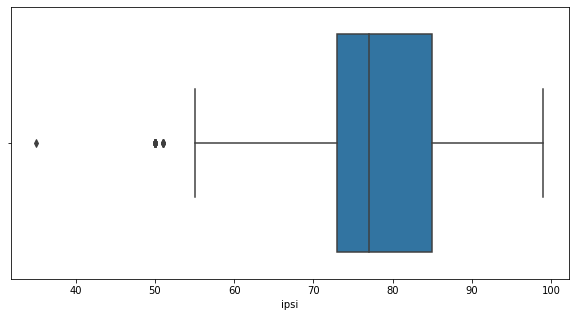

In [68]:
plt.figure(figsize=(10,5))
tempDf = rawData.copy()
ipsi = tempDf["ipsi"]
sns.boxplot(ipsi) ## Plot the default data.
ipsi.describe()

count    1476.000000
mean       79.629404
std         9.166937
min        60.000000
25%        73.000000
50%        78.000000
75%        90.000000
max        99.000000
Name: ipsi, dtype: float64

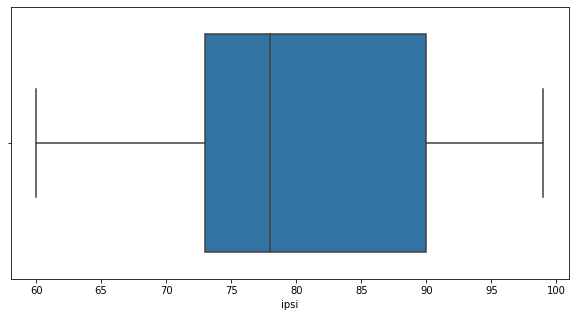

In [69]:
plt.figure(figsize=(10,5))
tempDf = rawData.copy()
ipsiNoOutliers = tempDf["ipsi"][tempDf["ipsi"] > 55]
sns.boxplot(ipsiNoOutliers) ## Plot the default data.
ipsiNoOutliers.describe()

Removing the outliers has very little effect at all, with the biggest change being the 75% quartile changing by 5. Since it doesn't affect the mean, I don't think those outliers are causing any harm even if imputing. However, we can also have a look at the actual records:

In [145]:
tempDf = rawData.copy()
outliers = tempDf[tempDf["ipsi"] < 55]
print("Outlier Count: " + str(len(outliers)))
outliers

Outlier Count: 31


,random,id,indication,diabetes,ihd,hypertension,arrhythmia,history,ipsi,contra,label
26,0.616346,142470,CVA,no,no,yes,no,no,50.0,40,NoRisk
99,0.897747,255097,A-F,no,no,yes,no,no,50.0,30,NoRisk
140,0.084495,233884,CVA,no,no,yes,no,no,50.0,40,NoRisk
171,0.787587,279010,CVA,no,no,yes,no,no,50.0,40,NoRisk
302,0.080884,159615,TIA,yes,no,yes,no,no,50.0,100,Risk
328,0.208271,210672,TIA,no,no,no,no,no,50.0,40,NoRisk
351,0.797398,294939,CVA,no,no,no,no,no,50.0,50,NoRisk
392,0.673854,276966,CVA,no,no,no,no,no,50.0,50,NoRisk
400,0.868120,295540,TIA,no,no,no,no,no,35.0,35,NoRisk
418,0.396298,259748,CVA,no,no,no,no,no,50.0,50,NoRisk


What is interesting her is the fact that there is an individual record classified as "risk". This could possibly be mislabeled and should be noted.

Also, previous suggestions that TIA and CVA indicate a reduced risk are supported witht he majority of indications being 1 of the 2. Similarly, Lots of "no" values in the ihd and arrhythmia columns supports the idea that they are big risk indicators, although it's surprising to see that hypertension is a relatively even split.

In [71]:
actions.append("risk cluster supports the idea that CVA and TIA reduce risk - indication may be worth keeping; perhaps it could be transformed to binary: cva/tia and !cva/tia")
actions.append("potential mislabel at index 302")

**Contra Distribution**

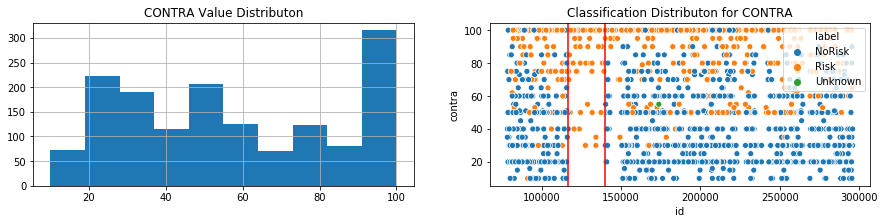

            contra
count  1519.000000
mean     56.828176
std      29.535671
min      10.000000
25%      30.000000
50%      50.000000
75%      85.000000
max     100.000000


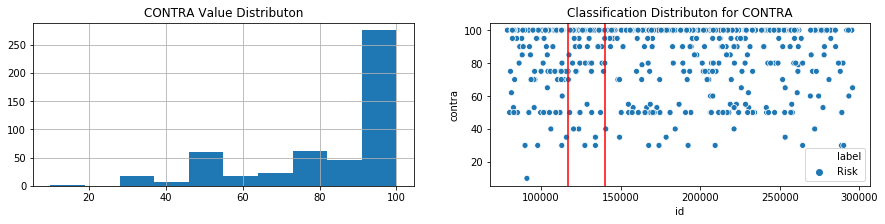

           contra
count  507.000000
mean    83.996055
std     20.880518
min     10.000000
25%     75.000000
50%     95.000000
75%    100.000000
max    100.000000


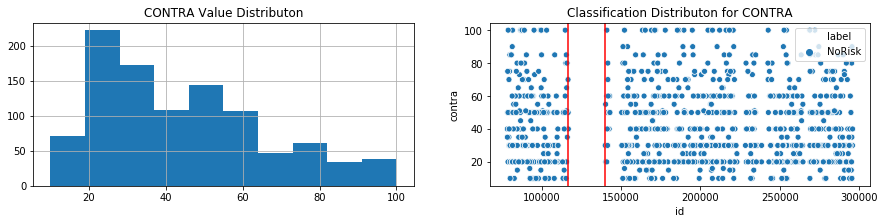

            contra
count  1007.000000
mean     43.109235
std      23.120137
min      10.000000
25%      20.000000
50%      40.000000
75%      60.000000
max     100.000000


In [72]:
df = rawData.copy()

## Convert contra strings to numeric.
df['contra'] = df['contra'].replace(r'^\s*$', np.nan, regex=True)
df['contra'] = df['contra'].apply(lambda x: float(x))
# df = df.replace("nan", np.nan)
# df = df.dropna() 

PlotClassAndClassificationDistribution(df, "contra", "id", False)

Both plots show the skewed distribution which favours higher contra values, but the seperation is less distinct than in ipsi, for example. 

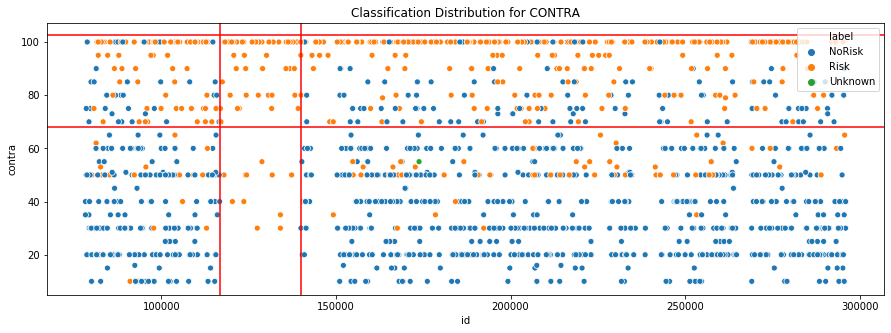

In [73]:
plt.figure(figsize=(15,5))
plt.axhline(y=68, color="red")
plt.axhline(y=102.5, color="red")

plt.axvline(x=116720, color="red") # Id-risk cluster
plt.axvline(x=139960, color="red") # Id-risk cluster
plt.title("Classification Distribution for CONTRA")
sns.scatterplot(x="id", y="contra", hue="label", data=df)

In contra, the classification distribution is quite  abit more sparse. Arguably, there are several weaker clusters, with the very highest contra values being the highest risk, anything between 68 and 95 being medium risk etc.

There also appears to be an anonomalous risk classification in the bottom row of data points, which I'm hoping has the same index as the outlier in ipsi.

In [74]:
tempDf = df.copy()
tempDf = tempDf[tempDf["contra"] < 20]
tempDf = tempDf[tempDf["label"] == "Risk"]
tempDf

,random,id,indication,diabetes,ihd,hypertension,arrhythmia,history,ipsi,contra,label
633,0.587207,91034,ASx,no,yes,yes,no,no,95.0,10.0,Risk


In [75]:
actions.append("Based on contra value, index 633 may be mislabelled or have an incorrect value; contra == 10 so it could be 100 if human error")
actions.append("consider a model for clustering or finding the best class boundaries in contra and ipsi- there may be multiple clusters")

By setting some boundaries for "low" and "high" contra, we can look at the percentage of risk and norisk classifications in each group.

We can also evaluate the effect that this id-risk cluster has.

In [76]:
# ////// REMOVE THE ID RISK CLUSTER
cluster = rawData.copy()
## Get the cluster indexes.
cluster = cluster[cluster["id"] > 116720]
cluster = cluster[cluster["id"] < 139960]
indexes = cluster.index.values

## Remove those indexes from the full df and plot modified scatter plot.
droppedClusters = rawData.copy()
droppedClusters = droppedClusters.drop(indexes)
droppedClusters['contra'] = droppedClusters['contra'].replace(r'^\s*$', np.nan, regex=True)
droppedClusters['contra'] = droppedClusters['contra'].apply(lambda x: float(x))
# //////


i = 0
for idf in [df, droppedClusters]:
    if (i == 0):
        title = " RAW:"
    else:
        title = " WITH RISK CLUSTER REMOVED:"
    i+=1
        
    print("HIGH CONTRA" + title)
    highContra = idf[idf["contra"] > 85]
    description = highContra["label"].describe()
    try:
        percent =  round((100/description["count"]) * description["freq"],2)
        if (np.isnan(percent)):
            print("Skipped nans...")

        print(description)
        print("% of most frequent: " + str(percent) + "\n")
    except:
        pass ## Div by 0 (nan)


    print("LOW CONTRA" + title)
    lowContra = idf[idf["contra"] <= 85]
    description = lowContra["label"].describe()
    try:
        percent =  round((100/description["count"]) * description["freq"],2)
        if (np.isnan(percent)):
            print("Skipped nans...")

        print(description)
        print("% of most frequent: " + str(percent) + "\n")
    except:
        pass ## Div by 0 (nan)

HIGH CONTRA RAW:
count      360
unique       3
top       Risk
freq       310
Name: label, dtype: object
% of most frequent: 86.11

LOW CONTRA RAW:
count       1156
unique         3
top       NoRisk
freq         958
Name: label, dtype: object
% of most frequent: 82.87

HIGH CONTRA WITH RISK CLUSTER REMOVED:
count      318
unique       3
top       Risk
freq       268
Name: label, dtype: object
% of most frequent: 84.28

LOW CONTRA WITH RISK CLUSTER REMOVED:
count       1132
unique         3
top       NoRisk
freq         958
Name: label, dtype: object
% of most frequent: 84.63



Interestingly, the effect of removing the risk cluster is almost negligable. It understandably reduces the accuracy (of predicting "Risk" if contra is high) in the "high" group since it removes some supporting data points, and likewise improves the accuracy of the lower group since it was falsely  inserting "risk" data points before. It may still be okay to keep those data points.

As numeric feature, we should also look for outliers in contra:

count    1519.000000
mean       56.828176
std        29.535671
min        10.000000
25%        30.000000
50%        50.000000
75%        85.000000
max       100.000000
Name: contra, dtype: float64

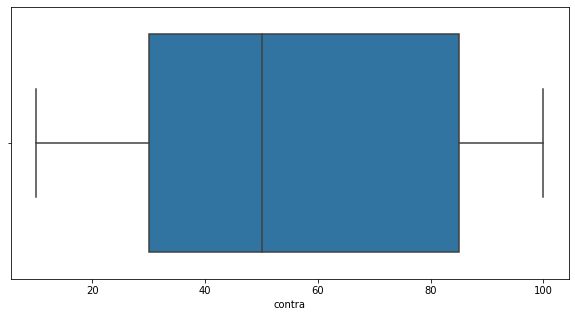

In [77]:
plt.figure(figsize=(10,5))
tempDf = rawData.copy()
tempDf['contra'] = tempDf['contra'].replace(r'^\s*$', np.nan, regex=True)
tempDf['contra'] = tempDf['contra'].apply(lambda x: float(x))
contra = tempDf["contra"]
sns.boxplot(contra) ## Plot the default data.
contra.describe()

There aren't any obvious outliers in contra although the standard deviation is quite high, which is visually represented in the sparsity of points as well. Contra may not be so valuable in the larger dataset.

# CLEANED DISTRIBUTION

In [78]:
for action in actions:
    print (action + "\n")

cleanData = cleanData.dropna() ## Drop nan values.

cleanData = cleanData.drop([493,889,1043,1243,452]) ## Remove possible duplicates.

cleanData = cleanData.drop(columns=['random']) ## Remove 'random' feature.

cleanData = cleanData.drop([475, 523]) ## Remove 'unknown' cases.

cleanData['contra'] = cleanData['contra'].replace(r'^\s*$', np.nan, regex=True) ## Convert 'contra' blanks to nan.

cleanData['contra'] = cleanData['contra'].apply(lambda x: float(x)) ## Convert 'contra' values to numbers.

cleanData = cleanData.dropna() ## Remove additional nan.

cleanData = cleanData.drop(columns=['id']) ## Drop id column.

Include ihd, hypertension, contra, ipsi, and arrhythmia in models

Consider an aggregate features of ihd, hypertension, contra, ipsi, and arrythmia

Pateints with a classification of TIA (and CVA, less-so) appear to be at reduced risk.

Drop diabetes column; the dataset is too imbalanced towards non-diabetics.

Arrhythmia is quite imbalanced but seems to be fairly reliable 

In [79]:
# df = rawData.copy()
# tempCleaned = rawData.copy()

# tempCleaned = tempCleaned.drop([493,889,1043,1243,452,475,523])
# tempCleaned = tempCleaned.drop(columns=["random", "id"])
# tempCleaned["indication"] = tempCleaned["indication"].apply(lambda x: str(x).lower())
# tempCleaned["contra"] = tempCleaned["contra"].replace(r'^\s*$', np.nan, regex=True)
# tempCleaned = tempCleaned.replace("nan", np.nan)
# tempCleaned = tempCleaned.dropna()
# tempCleaned["contra"] = tempCleaned["contra"].apply(lambda x: int(x))

# tempCleaned

and?

<a href="#contents">[back to top]</a>

<a id="13"></a>
<h3>1.3. Data Preparation</h3>

<a href="#contents">[back to top]</a>

<a id="131"></a>
<h4>1.3.0. Feature Selection</h4>
Remove definite columns and evaluate if missing or duplicates still exist.

Decide features to keep and then support with a random forest weightof().

In [80]:
model = rf(n_estimators=1000, max_depth=7)##, oob_score=True)##, verbose=2)
fittedModel = model.fit(xtr,ytr)
predicted = fittedModel.predict(xte)

importances = []
for feature in zip(xtr.columns.values, sorted(fittedModel.feature_importances_)):
    importances.append(feature)

importances

NameError: name 'xtr' is not defined

In [ ]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
# sfm = SelectFromModel(fittedModel, threshold=0.15)
# feat_labels=xtr.columns.values
# # Train the selector
# sfm.fit(xtr, ytr)
# # Print the names of the most important features
# for feature_list_index in sfm.get_support(indices=True):
#     print(feat_labels[feature_list_index])

// cleanData = cleanData.dropna() ## Drop nan values.

// cleanData = cleanData.drop([493,889,1043,1243,452]) ## Remove possible duplicates.

cleanData = cleanData.drop(columns=['random']) ## Remove 'random' feature.

cleanData = cleanData.drop([475, 523]) ## Remove 'unknown' cases.

cleanData['contra'] = cleanData['contra'].replace(r'^\s*$', np.nan, regex=True) ## Convert 'contra' blanks to nan.

cleanData['contra'] = cleanData['contra'].apply(lambda x: float(x)) ## Convert 'contra' values to numbers.

cleanData = cleanData.dropna() ## Remove additional nan.

cleanData = cleanData.drop(columns=['id']) ## Drop id column.

Include ihd, hypertension, contra, ipsi, and arrhythmia in models

Consider an aggregate features of ihd, hypertension, contra, ipsi, and arrythmia

Pateints with a classification of TIA (and CVA, less-so) appear to be at reduced risk.

Drop diabetes column; the dataset is too imbalanced towards non-diabetics.

Arrhythmia is quite imbalanced but seems to be fairly reliable still.

Drop history - the class imbalance and seperation is very poor.

the right skey in ipsi distribution causes some concern as there are obivously data points in the lower regions - these may not be a real world representation and we can't check

MAYBE include ipsi

Test model with and without the 'Risk cluster' - effect seems negligable in distribution but models may suffer in practice.

risk cluster supports the idea that CVA and TIA reduce risk - indication may be worth keeping; perhaps it could be transformed to binary: cva/tia and !cva/tia

potential mislabel at index 302

Based on contra value, index 633 may be mislabelled or have an incorrect value; contra == 10 so it could be 100 if human error

consider a model for clustering or finding the best class boundaries in contra and ipsi- there may be multiple clusters


<a id="131"></a>
<h4>1.3.1. Cleaning</h4>

In [ ]:
cdf = rawData.copy()

In [ ]:
cdf.iloc[302]

In [ ]:
cdf.iloc[633]

In [ ]:
cdf["contra"].iloc[633] = '100'
cdf["contra"].iloc[633]

In [ ]:
# cdf = rawData.copy()
# cdf = cdf.drop(columns=["random", "id", "diabetes", "history", "ipsi"])
cdf = cdf.drop(columns=["random", "diabetes", "history", "ipsi"])

cdf['contra'] = cdf['contra'].replace(r'^\s*$', np.nan, regex=True)
cdf['contra'] = cdf['contra'].apply(lambda x: float(x))

unknowns = cdf[cdf["label"] == "Unknown"].index.values
cdf = cdf.drop(unknowns)

cdf = cdf.replace(["no", "yes", "NoRisk", "Risk"], [0,1,0,1])



## Could get_dummies instead.
cdf = cdf.replace(["A-F", "ASx", "Asx", "TIA", "CVA"], [1,1,1,0,0])

cluster = rawData.copy()
## Get the cluster indexes.
cluster = cluster[cluster["id"] > 116720]
cluster = cluster[cluster["id"] < 139960]
indexes = cluster.index.values

cdfNoCluster = cdf.copy()
cdfNoCluster = cdfNoCluster.drop(indexes)

cdf

In [ ]:
cdfNoCluster

In [ ]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans(cdf)

In [ ]:
cdf = cdf.drop(nans(cdf).index.values)
cdf

In [ ]:
nans(cdfNoCluster)

In [ ]:
cdfNoCluster = cdfNoCluster.drop(nans(cdfNoCluster).index.values)
cdfNoCluster

<a href="#contents">[back to top]</a>

<a id="133"></a>
<h4>1.3.3. Stratification (TTS)</h4>

# KFOLD

In [ ]:
kfold = rawData.copy()
kfold = kfold.drop(columns=["random", "diabetes", "history", "ipsi", "id"])

## Make contra numeri.
kfold['contra'] = kfold['contra'].replace(r'^\s*$', np.nan, regex=True)
kfold['contra'] = kfold['contra'].apply(lambda x: float(x))

## Drop unknown classifications.
unknowns = kfold[kfold["label"] == "Unknown"].index.values
kfold = kfold.drop(unknowns)

kfold = kfold.replace(["no", "yes", "NoRisk", "Risk"], [0,1,0,1])

## Make indication binary.
## Could get_dummies instead.
kfold = kfold.replace(["A-F", "ASx", "Asx", "TIA", "CVA"], [1,1,1,0,0])

kfold = kfold.drop(nans(kfold).index.values)
kfold = kfold.reindex()

## Split into x and y.
data = kfold.drop(columns=["label"])
labels = kfold["label"]

kf = StratifiedKFold(n_splits=10, shuffle=True)

## https://stackoverflow.com/questions/51852551/key-error-not-in-index-while-cross-validation
for train_index, test_index in kf.split(data,labels):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = data.iloc[train_index], data.iloc[test_index]
    y_train, y_test = labels.iloc[train_index], labels.iloc[test_index]

In [ ]:
for col in cdf.columns.values:
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    cdf[col].hist()
    plt.title(col)

    plt.subplot(1,2,2)
    sns.scatterplot(x="id", y=col, data=cdf, hue="label")
    
    plt.show()

In [ ]:
data = cdf#.drop(columns=["label"]) ## Keep label in data for visualisations and remove once good split seed is found.
labels = cdf["label"]
xtr, xte, ytr, yte = skl.model_selection.train_test_split(data, labels, shuffle=True, random_state=69)

In [ ]:
for col in xtr.columns.values:
    if col == "id" or col == "label":
        continue
        
    plt.figure(figsize=(15,5))

    ## Train split
    plt.subplot(2,4,1)
    xtr[col].hist()
    plt.title(col)

    plt.subplot(2,4,2)
    sns.scatterplot(x="id", y=col, data=xtr, hue="label")
    
    ## Test split
    plt.subplot(2,4,3)
    xte[col].hist()
    plt.title(col)

    plt.subplot(2,4,4)
    sns.scatterplot(x="id", y=col, data=xte, hue="label")
    
    plt.show()

In [ ]:
cdf = cdf.drop(columns=["id"])
cdf

In [ ]:
cdfNoCluster = cdfNoCluster.drop(columns=["id"])
cdfNoCluster

<a href="#contents">[back to top]</a>

<a id="14"></a>
<h3>1.4. Modeling</h3>

In [ ]:
data = cdf.drop(columns=["label"])
labels = cdf["label"]

xtr, xte, ytr, yte = skl.model_selection.train_test_split(data, labels, shuffle=True, random_state=69)

In [ ]:
def CreateDecisionTree(xtr, ytr, xte, yte, maxDepth):
    model = DecisionTreeClassifier(max_depth=maxDepth) # Make a new model.
    fittedModel = model.fit(X=xtr, y=ytr) ## Fit to train split.
    predicted = fittedModel.predict(xte) ## Predict test split.

    ## Return trained model and confusion matrix of test data.
    return fittedModel, confusion_matrix(yte, predicted).ravel()

In [ ]:
def CreateSVM(xtr, ytr, xte, yte, gamma, c):
    model = svm.SVC(gamma=gamma, C=c) # Make a new model.
    fittedModel = model.fit(X=xtr, y=ytr) ## Fit to train split.
    predicted = fittedModel.predict(xte) ## Predict test split.

    ## Return trained model and confusion matrix of test data.
    return fittedModel, confusion_matrix(yte, predicted).ravel()

In [ ]:
def CreateMLP (xtr, ytr, xte, yte, layers, lr, epochs, batches):
    model = mlp(layers, learning_rate_init=lr, verbose=True, learning_rate="adaptive", max_iter=epochs, batch_size=batches)
    fittedModel = model.fit(X=xtr, y=ytr)
    predicted = fittedModel.predict(xte)
    
    return fittedModel, confusion_matrix(yte, predicted).ravel()    

In [ ]:
def PlotCM(xtr,ytr,xte,yte,model):
    ## Training Confusion
    skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "Risk"], normalize="true", cmap="gist_yarg")    
    ## Test Confusion
    skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "Risk"], normalize="true", cmap="gist_yarg")

In [ ]:
def PrintMetrics(model, confusionMatrix, x, y):
        tp = confusionMatrix[0]
        fp = confusionMatrix[1]
        fn = confusionMatrix[2]
        tp = confusionMatrix[3]

        totalTrue =  tp + tn
        totalFalse =  fp + fn
        total =  totalTrue + totalFalse
        acc = model.score(x, y)

        tnrate = round((tn / (fn + tn)) * 100, 2)
        tprate = round((tp / (fp + tp)) * 100, 2)
        print("\nTrue Negatives: " + str(tn))
        print("False Negatives: " + str(fn))
        print(str(tnrate) + "%")

        print("True Positives: " + str(tp))
        print("False Positives: " + str(fp))
        print(str(tprate) + "%")

        skl.metrics.plot_confusion_matrix(model, x, y, display_labels=["No Risk", "Risk"], normalize="true", cmap="gist_yarg")    


In [ ]:
# model, cm = CreateDecisionTree(xtr,ytr,xte,yte,7)
# model, cm = CreateSVM(xtr, ytr, xte, yte)
model, cm = CreateSVM(xtr,ytr,xte,yte,gamma=0.001,c=100)
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc
cm

In [ ]:
# model, cm = CreateDecisionTree(xtr,ytr,xte,yte,7)
# model, cm = CreateSVM(xtr, ytr, xte, yte)
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
model, cm = CreateMLP (xtr, ytr, xte, yte, 10, 0.0001, 2000, 350)
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
model, cm = CreateMLP (xtr, ytr, xte, yte, 10, 0.0001, 5000, 350)
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
model, cm = CreateMLP (xtr, ytr, xte, yte, 10, 0.0001, 4000, 350)
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
model, cm = CreateMLP (xtr, ytr, xte, yte, 400, 0.001, 7000, 350)
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [10,20,30,40], 0.00001, 10000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [10,10,10,10], 0.0001, 10000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [10,10,10,10,10], 0.0001, 10000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [20,20,20,20,20], 0.0001, 10000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [30,30,30,30,30], 0.0001, 10000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [50,50,50,50,50], 0.0001, 10000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [30,30,30,30,30,30], 0.0001, 10000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [50,50,50], 0.00001, 20000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
model, cm = CreateMLP (xtr, ytr, xte, yte, [10,100,200,400], 0.00001, 2000, "auto")
skl.metrics.plot_confusion_matrix(model, xtr, ytr, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")    
skl.metrics.plot_confusion_matrix(model, xte, yte, display_labels=["No Risk", "RisK"], normalize="true", cmap="gist_yarg")
model.score(xte, yte) ## Acc

In [ ]:
def CreateDecisionTree(xtr,ytr,xte,yte):
    bestAcc = bestTp = bestFp = bestTn = bestFn = bestDepth = bestModel = 0
    
    for i in range(1,21):
        model = DecisionTreeClassifier(max_depth=i) # Make a new model.
        fittedModel = model.fit(X=xtr, y=ytr) ## Fit to train split.
        predicted = fittedModel.predict(xte) ## Predict test split.

        tn, fp, fn, tp = skl.metrics.confusion_matrix(yte, predicted).ravel()

        et =  tp + tn
        ef =  fp + fn
        e =  et + ef
        acc = round((100 / e) * et, 2)
        
        if acc > bestAcc:
            bestDepth = i
            bestAcc = acc
            bestModel = model
            bestTp = tp
            bestFp = fp
            bestTn = tn
            bestFn = fn

    print("Best depth: " + str(bestDepth))
    print("\nAcc: " + str(bestAcc) + "%")
    
#         print("Train loss:")
#         print("MAE: "+ str(mae(ytr, fittedModel.predict(xtr))))
#         print("MSE: "+ str(mse(ytr, fittedModel.predict(xtr))))

#         print("\nTest loss:")
#         print("MAE: "+ str(mae(yte, fittedModel.predict(xte))))
#         print("MSE: "+ str(mse(yte, fittedModel.predict(xte))))


    tnrate = round((bestTn / (bestFn + bestTn)) * 100, 2)
    tprate = round((bestTp / (bestFp + bestTp)) * 100, 2)
    print("\nTrue Negatives: " + str(bestTn))
    print("False Negatives: " + str(bestFn))
    print(str(tnrate) + "%")

    print("True Positives: " + str(bestTp))
    print("False Positives: " + str(bestFp))
    print(str(tprate) + "%")

    plot_tree(bestModel, feature_names=xtr.columns.values)

In [ ]:
CreateDecisionTree(xtr,ytr,xte,yte)

In [ ]:
data = cdfNoCluster.drop(columns=["label"])
labels = cdfNoCluster["label"]

xtr, xte, ytr, yte = skl.model_selection.train_test_split(data, labels, shuffle=True, random_state=69)
CreateDecisionTree(xtr,ytr,xte,yte)

<a href="#contents">[back to top]</a>

#### <a id="15"></a>
<h3>1.5. Evaluation</h3>

<a href="#contents">[back to top]</a>

<a id="16"></a>
<h3>1.6. (Theoretical) Deployment</h3>

<a href="#contents">[back to top]</a>